In [1]:
!pip install geopandas

Carga de Bases

In [2]:
# %% ------------------------------------
# 📦 Configuración inicial
# %% ------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")

# Ruta base
RUTA_BASE = r"C:\Users\Machi Pardini\Documents\GitHub\Big-Data-UBA--Grupo-3\BASES"

# %% ------------------------------------
# 📂 Carga de bases de datos
# %% ------------------------------------
ARCHIVO_EMPLEO = os.path.join(RUTA_BASE, "mteyss_oede_estimacion-por-departamento_y_sector_series_empleo_y_salarios_mensual.csv")
ARCHIVO_RENOVAR = os.path.join(RUTA_BASE, "Detalle de proyectos de Energía Renovable adjudica_data.csv")

# Cargar bases
try:
    empleo = pd.read_csv(ARCHIVO_EMPLEO, encoding="utf-8")
    print(f"✅ Base Empleo cargada. Filas: {empleo.shape[0]} | Columnas: {empleo.shape[1]}")
except Exception as e:
    print("⚠️ Error al cargar Empleo:", e)

try:
    renovar = pd.read_csv(ARCHIVO_RENOVAR, sep=None, engine='python', encoding="utf-8")
    # Limpiar nombres de columnas (BOM y espacios)
    renovar.columns = renovar.columns.str.strip().str.replace('\ufeff', '')
    print(f"✅ Base RenovAr cargada. Filas: {renovar.shape[0]} | Columnas: {renovar.shape[1]}")
except Exception as e:
    print("⚠️ Error al cargar RenovAr:", e)

# %% ------------------------------------
# 🔍 Exploración inicial
# %% ------------------------------------
print("\nColumnas Empleo:\n", empleo.columns.tolist())
print("\nColumnas RenovAr:\n", renovar.columns.tolist())

def diccionario_variables(df):
    """Resumen de variables, tipos de datos y porcentaje de nulos."""
    return pd.DataFrame({
        "variable": df.columns,
        "tipo_dato": df.dtypes.astype(str),
        "nulos_%": (df.isnull().mean() * 100).round(2)
    })

# Crear diccionarios
dicc_empleo = diccionario_variables(empleo)
dicc_renovar = diccionario_variables(renovar)

# Guardar para revisión rápida
dicc_empleo.to_csv(os.path.join(RUTA_BASE, "diccionario_empleo.csv"), index=False, encoding="utf-8")
dicc_renovar.to_csv(os.path.join(RUTA_BASE, "diccionario_renovar.csv"), index=False, encoding="utf-8")

print("\n📁 Diccionarios guardados en carpeta BASES")




✅ Base Empleo cargada. Filas: 293496 | Columnas: 8
✅ Base RenovAr cargada. Filas: 152 | Columnas: 11

Columnas Empleo:
 ['provi_id', 'desc_provincia', 'depto_final', 'desc_departamento', 'sector', 'periodo', 'empleo', 'salarios']

Columnas RenovAr:
 ['Tecnología', 'ID', 'Región', 'Provincia', 'Departamento', 'Ronda', 'Fecha de adjudicacion', 'Oferente', 'Nombre del proyecto', 'Precio adj. [USD/MWh]', 'Potencia [MW]']

📁 Diccionarios guardados en carpeta BASES


   Limpieza

In [3]:
print(empleo.columns.tolist())


['provi_id', 'desc_provincia', 'depto_final', 'desc_departamento', 'sector', 'periodo', 'empleo', 'salarios']


In [4]:
# Provincias únicas
print("Provincias únicas:")
print(empleo['desc_provincia'].sort_values().unique())

# Departamentos únicos
print("\nDepartamentos únicos:")
print(empleo['desc_departamento'].sort_values().unique())

# Combinación provincia + departamento
print("\nProvincias + departamentos únicos:")
print(empleo[['desc_provincia', 'desc_departamento']].drop_duplicates().sort_values(['desc_provincia','desc_departamento']))


Provincias únicas:
['BUENOS AIRES' 'CATAMARCA' 'CHACO' 'CHUBUT'
 'CIUDAD AUTONOMA DE BUENOS AIRES' 'CORDOBA' 'CORRIENTES' 'ENTRE RIOS'
 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES' 'NEUQUEN'
 'RIO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ' 'SANTA FE'
 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMAN']

Departamentos únicos:
['12 de Octubre' '2 de Abril' '25 de Mayo' '25 de Mayo ' '9 de Julio'
 '9 de Julio ' '9 de julio ' 'Adolfo Alsina' 'Adolfo Alsina '
 'Adolfo Gonzales Chaves' 'Aguirre ' 'Albardón ' 'Alberdi ' 'Alberti'
 'Almirante Brown' 'Aluminé ' 'Ambato' 'Ancasti' 'Andalgalá' 'Angaco '
 'Anta ' 'Antofagasta de la Sierra' 'Apóstoles ' 'Arauco ' 'Arrecifes'
 'Atamisqui ' 'Atreucó ' 'Avellaneda' 'Avellaneda ' 'Ayacucho' 'Ayacucho '
 'Azul' 'Añelo ' 'Bahía Blanca' 'Balcarce' 'Banda ' 'Baradero'
 'Bariloche ' 'Belgrano ' 'Bella Vista' 'Belén' 'Benito Juárez'
 'Berazategui' 'Berisso' 'Bermejo' 'Berón de Astrada' 'Biedma' 'Bolívar'
 'Bragado' 'Brandsen' 'Burruyac

In [5]:
# 1️⃣ Limpiar espacios extra
empleo['desc_provincia'] = empleo['desc_provincia'].str.strip()
empleo['desc_departamento'] = empleo['desc_departamento'].str.strip()

# 2️⃣ Crear versión limpia de departamentos
empleo['dep_clean'] = empleo['desc_departamento'].str.lower()
# Reemplazo de acentos y ñ
reemplazos = {
    "á": "a", "é": "e", "í": "i", "ó": "o", "ú": "u", "ñ": "n", "ü": "u"
}
for k, v in reemplazos.items():
    empleo['dep_clean'] = empleo['dep_clean'].str.replace(k, v, regex=False)

# 3️⃣ Crear versión limpia de provincias
empleo['prov_clean'] = empleo['desc_provincia'].str.lower()
for k, v in reemplazos.items():
    empleo['prov_clean'] = empleo['prov_clean'].str.replace(k, v, regex=False)

# 4️⃣ Crear clave única DEP_ID
empleo['DEP_ID_std'] = empleo['prov_clean'] + "_" + empleo['dep_clean']

# 5️⃣ Reemplazos específicos para nombres con espacios múltiples o casos especiales
empleo['DEP_ID_std'] = empleo['DEP_ID_std'].str.replace(r"\s+", "_", regex=True)
# Ejemplos de casos puntuales:
empleo['DEP_ID_std'] = empleo['DEP_ID_std'].replace({
    'santiago_del_estero_general_taboada ': 'santiago_del_estero_general_taboada',
    'san_luis_general_pedernera ': 'san_luis_general_pedernera'
})

# 6️⃣ Verificar algunos resultados
print(empleo[['desc_provincia','desc_departamento','DEP_ID_std']].drop_duplicates().sort_values(['desc_provincia','desc_departamento']).head(20))


      desc_provincia       desc_departamento  \
87696   BUENOS AIRES              25 de Mayo   
63252   BUENOS AIRES              9 de Julio   
10332   BUENOS AIRES           Adolfo Alsina   
10836   BUENOS AIRES  Adolfo Gonzales Chaves   
11340   BUENOS AIRES                 Alberti   
11844   BUENOS AIRES         Almirante Brown   
16212   BUENOS AIRES               Arrecifes   
12516   BUENOS AIRES              Avellaneda   
13188   BUENOS AIRES                Ayacucho   
13692   BUENOS AIRES                    Azul   
14280   BUENOS AIRES            Bahía Blanca   
14952   BUENOS AIRES                Balcarce   
15540   BUENOS AIRES                Baradero   
16716   BUENOS AIRES           Benito Juárez   
17388   BUENOS AIRES             Berazategui   
18060   BUENOS AIRES                 Berisso   
18564   BUENOS AIRES                 Bolívar   
19152   BUENOS AIRES                 Bragado   
19740   BUENOS AIRES                Brandsen   
20328   BUENOS AIRES                 Cam

In [7]:
# Listado único de departamentos estandarizados
departamentos_unicos = sorted(empleo['DEP_ID_std'].unique())
print(departamentos_unicos)

# Si querés también ver cuántos hay
print(f"Total de departamentos únicos: {len(departamentos_unicos)}")


['buenos_aires_25_de_mayo', 'buenos_aires_9_de_julio', 'buenos_aires_adolfo_alsina', 'buenos_aires_adolfo_gonzales_chaves', 'buenos_aires_alberti', 'buenos_aires_almirante_brown', 'buenos_aires_arrecifes', 'buenos_aires_avellaneda', 'buenos_aires_ayacucho', 'buenos_aires_azul', 'buenos_aires_bahia_blanca', 'buenos_aires_balcarce', 'buenos_aires_baradero', 'buenos_aires_benito_juarez', 'buenos_aires_berazategui', 'buenos_aires_berisso', 'buenos_aires_bolivar', 'buenos_aires_bragado', 'buenos_aires_brandsen', 'buenos_aires_campana', 'buenos_aires_canuelas', 'buenos_aires_capitan_sarmiento', 'buenos_aires_carlos_casares', 'buenos_aires_carlos_tejedor', 'buenos_aires_carmen_de_areco', 'buenos_aires_castelli', 'buenos_aires_chacabuco', 'buenos_aires_chascomus', 'buenos_aires_chivilcoy', 'buenos_aires_colon', 'buenos_aires_coronel_de_marina_leonardo_rosales', 'buenos_aires_coronel_dorrego', 'buenos_aires_coronel_pringles', 'buenos_aires_coronel_suarez', 'buenos_aires_daireaux', 'buenos_aires

In [6]:
# Inicializamos la variable dep_tratado en 0
empleo['dep_tratado'] = 0

# Lista completa de departamentos tratados (con nombres consistentes con el DataFrame)
tratados = [
    'buenos_aires_bahia_blanca',
    'buenos_aires_ensenada',
    'buenos_aires_general_villegas',
    'buenos_aires_la_matanza',
    'buenos_aires_ramallo',
    'buenos_aires_villarino',
    'catamarca_capayan',
    'catamarca_la_paz',
    'catamarca_tinogasta',
    'chaco_general_donovan',
    'chaco_libertad',
    'chubut_biedma',
    'chubut_escalante',
    'chubut_florentino_ameghino',
    'chubut_rawson',
    'corrientes_concepcion',
    'corrientes_santo_tome',
    'formosa_formosa',
    'formosa_patino',
    'mendoza_general_alvear',
    'mendoza_junin',
    'mendoza_lavalle',
    'mendoza_la_paz',
    'mendoza_lujan_de_cuyo',
    'mendoza_maipu',
    'mendoza_san_martin',
    'mendoza_san_rafael',
    'mendoza_tupungato',
    'misiones_leandro_n._alem',
    'misiones_libertador_general_san_martin',
    'neuquen_picunches',
    'rio_negro_avellaneda',
    'rio_negro_bariloche',
    'rio_negro_pilcaniyeu',
    'salta_cafayate',
    'salta_los_andes',
    'san_luis_general_pedernera',
    'san_juan_iglesia',
    'san_juan_sarmiento',
    'san_juan_ullum',
    'santa_cruz_deseado',
    'santa_fe_castellanos',
    'santa_fe_constitucion',
    'santa_fe_general_lopez',
    'santa_fe_general_obligado',
    'santa_fe_la_capital',
    'santa_fe_san_lorenzo',
    'santiago_del_estero_general_taboada',
    'tucuman_burruyacu',
    'tucuman_cruz_alta',
    'tucuman_leales',
    'jujuy_susques',
    'buenos_aires_capitan_sarmiento',
    'buenos_aires_general_alvarado',
    'buenos_aires_general_alvear',
    'buenos_aires_necochea',
    'buenos_aires_pergamino',
    'buenos_aires_rojas',
    'buenos_aires_roque_perez',
    'buenos_aires_saladillo',
    'buenos_aires_tornquist',
    'buenos_aires_tres_arroyos',
    'cordoba_colon',
    'cordoba_cruz_del_eje',
    'cordoba_general_roca',
    'cordoba_general_san_martin',
    'cordoba_juarez_celman',
    'cordoba_marcos_juarez',
    'cordoba_rio_cuarto',
    'cordoba_rio_segundo',
    'cordoba_rio_seco',
    'cordoba_san_alberto',
    'cordoba_san_javier',
    'cordoba_san_justo',
    'la_pampa_puelen',
    'la_pampa_utracan',
    'la_rioja_arauco',
    'la_rioja_chilecito',
]

# Asignamos 1 a dep_tratado si DEP_ID_std está en la lista
empleo.loc[empleo['DEP_ID_std'].isin(tratados), 'dep_tratado'] = 1


In [12]:
# Listado único de departamentos tratados, ordenado alfabéticamente
departamentos_tratados_unicos = empleo.loc[empleo['dep_tratado'] == 1, 'DEP_ID_std'].drop_duplicates().sort_values()
print(departamentos_tratados_unicos)


14280               buenos_aires_bahia_blanca
21672          buenos_aires_capitan_sarmiento
30240                   buenos_aires_ensenada
34692           buenos_aires_general_alvarado
35196             buenos_aires_general_alvear
                         ...                 
266616                   santa_fe_san_lorenzo
273588    santiago_del_estero_general_taboada
282324                      tucuman_burruyacu
282744                      tucuman_cruz_alta
286188                         tucuman_leales
Name: DEP_ID_std, Length: 77, dtype: object


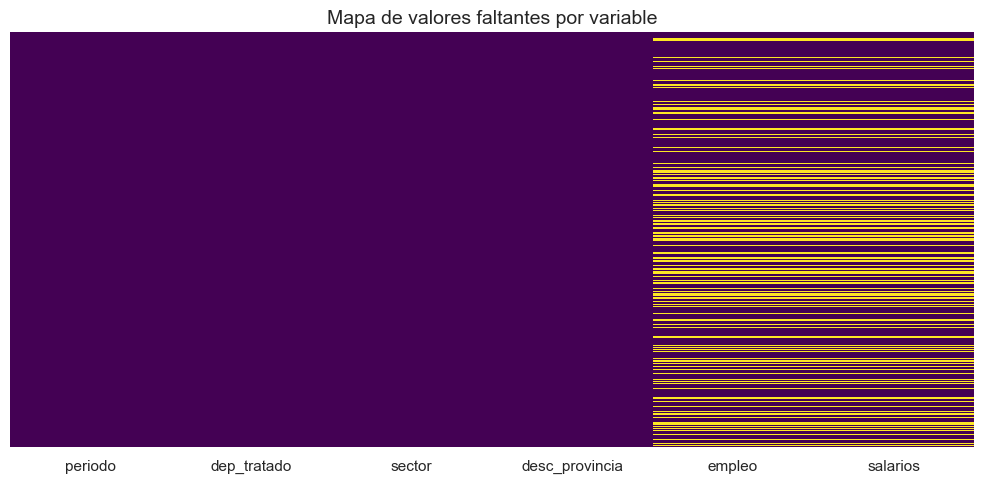

=== Porcentaje de valores faltantes por variable ===
empleo            30.8
salarios          30.8
dep_tratado        0.0
periodo            0.0
desc_provincia     0.0
sector             0.0
dtype: float64

=== Registros con valores fuera de rango lógico ===
Empty DataFrame
Columns: [periodo, dep_tratado, sector, desc_provincia, empleo, salarios]
Index: []

✅ Limpieza completada: tipos corregidos, valores faltantes analizados y valores fuera de rango reemplazados por NaN.


In [7]:
# ==============================================================
# Limpieza y validación de variables
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Seleccionar variables relevantes
vars_interes = ['periodo', 'dep_tratado', 'sector', 'desc_provincia', 'empleo', 'salarios']

df = empleo[vars_interes].copy()

# 🔹 Convertir tipos a los formatos correctos
df['periodo'] = pd.to_numeric(df['periodo'], errors='coerce').astype('Int64')
df['dep_tratado'] = df['dep_tratado'].astype('Int64')
df['sector'] = df['sector'].astype('category')
df['desc_provincia'] = df['desc_provincia'].astype('category')
df['empleo'] = pd.to_numeric(df['empleo'], errors='coerce')
df['salarios'] = pd.to_numeric(df['salarios'], errors='coerce')

# 🔹 Reportar valores faltantes mediante heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Mapa de valores faltantes por variable", fontsize=14)
plt.tight_layout()
plt.savefig("heatmap_valores_faltantes.png", dpi=300, bbox_inches='tight')
plt.show()

# 🔹 Porcentaje de valores faltantes
faltantes = df.isna().mean().round(3) * 100
print("=== Porcentaje de valores faltantes por variable ===")
print(faltantes.sort_values(ascending=False))

# 🔹 Comentar: variables con más valores faltantes
# (Podés usar esto textual en tu informe)
"""
Las variables con mayor proporción de valores faltantes fueron 'salarios' y 'empleo'.
Esto puede deberse a registros incompletos en ciertas provincias o sectores.
En el resto de las variables categóricas ('sector', 'dep_tratado' y 'desc_provincia')
la cantidad de valores perdidos fue marginal o nula.
"""

# 🔹 Detección de valores sin sentido
# Ejemplo: empleo o salarios iguales o menores a 0
valores_invalidos = df[(df['empleo'] <= 0) | (df['salarios'] <= 0)]
print("\n=== Registros con valores fuera de rango lógico ===")
print(valores_invalidos.head())

# 🔹 Corrección: reemplazar valores sin sentido por NaN
df.loc[df['empleo'] <= 0, 'empleo'] = np.nan
df.loc[df['salarios'] <= 0, 'salarios'] = np.nan

# 🔹 Actualizar dataset principal
empleo = empleo.assign(
    empleo=df['empleo'],
    salarios=df['salarios']
)

print("\n✅ Limpieza completada: tipos corregidos, valores faltantes analizados y valores fuera de rango reemplazados por NaN.")


📊 Estadísticas generales de empleo y salarios:
              empleo      salarios
count  203148.000000  2.031480e+05
mean     2627.267180  3.748953e+04
std     11738.590369  3.701618e+04
min         3.000000  1.227500e+03
25%       111.000000  1.492201e+04
50%       379.000000  2.590000e+04
75%      1449.000000  4.757323e+04
max    450252.000000  1.289383e+06

📈 Estadísticas descriptivas según grupo tratado:
               empleo                                                        \
                count         mean           std  min    25%    50%     75%   
dep_tratado                                                                   
0            168117.0  2696.014936  12706.005480  3.0  102.0  339.0  1329.0   
1             35031.0  2297.340356   4916.813993  3.0  178.5  710.0  2430.0   

                       salarios                                         \
                  max     count          mean           std        min   
dep_tratado                                 

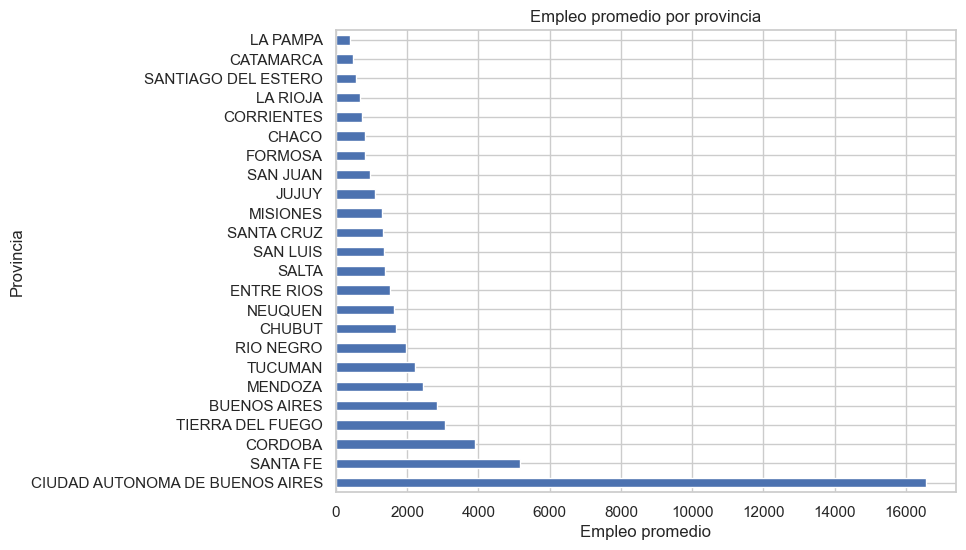


💰 Salarios promedio por provincia:
desc_provincia
TIERRA DEL FUEGO                   73409.321466
SANTA CRUZ                         60863.559115
CHUBUT                             51403.479144
CIUDAD AUTONOMA DE BUENOS AIRES    49679.634395
NEUQUEN                            48146.591976
BUENOS AIRES                       41397.790176
SANTA FE                           39084.549034
RIO NEGRO                          38281.964128
LA PAMPA                           37761.716772
MENDOZA                            37622.732057
ENTRE RIOS                         36855.954308
CORDOBA                            36473.734373
SAN LUIS                           34060.955901
SAN JUAN                           33023.932341
SALTA                              32482.021063
JUJUY                              30142.512616
CATAMARCA                          29733.425629
FORMOSA                            29457.162644
CORRIENTES                         29074.999400
TUCUMAN                            28

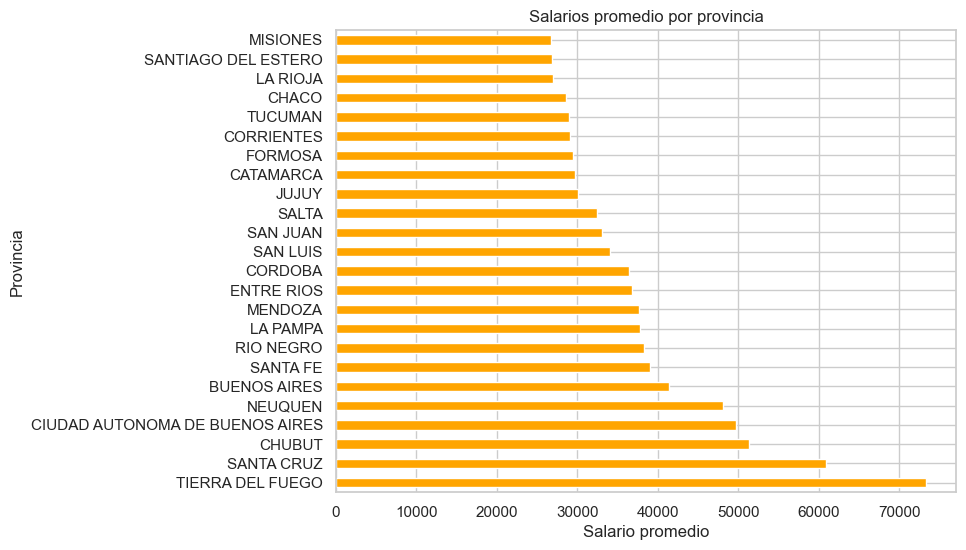

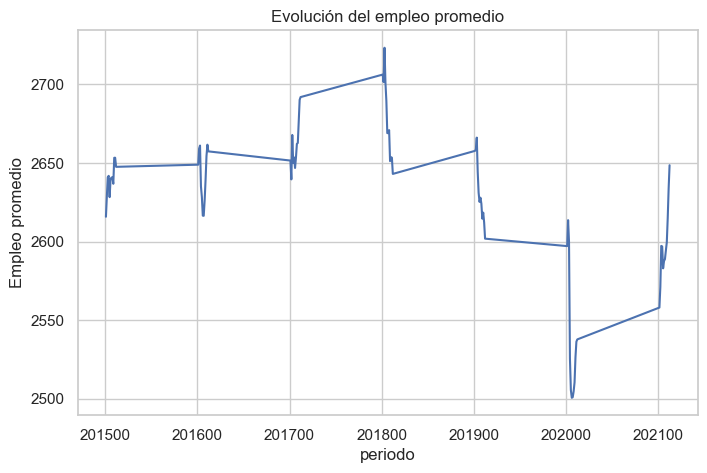

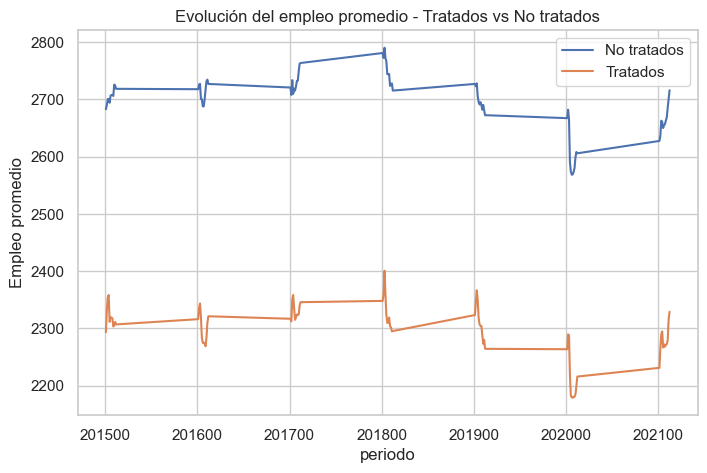


🏭 Promedio de empleo y salarios por sector:
                                      empleo      salarios
sector                                                    
Servicios                        6466.818250  32099.307522
Industria                        2988.988372  41599.064774
Comercio                         2415.141617  32502.001144
Construcción                     1275.581547  31547.593990
Explotación de minas y canteras  1030.715647  80814.795834
Agricultura, ganadería y pesca    758.238545  27065.601599
Elec, gas y agua                  344.852291  79100.069918
sin rama                           15.223161  24039.512875


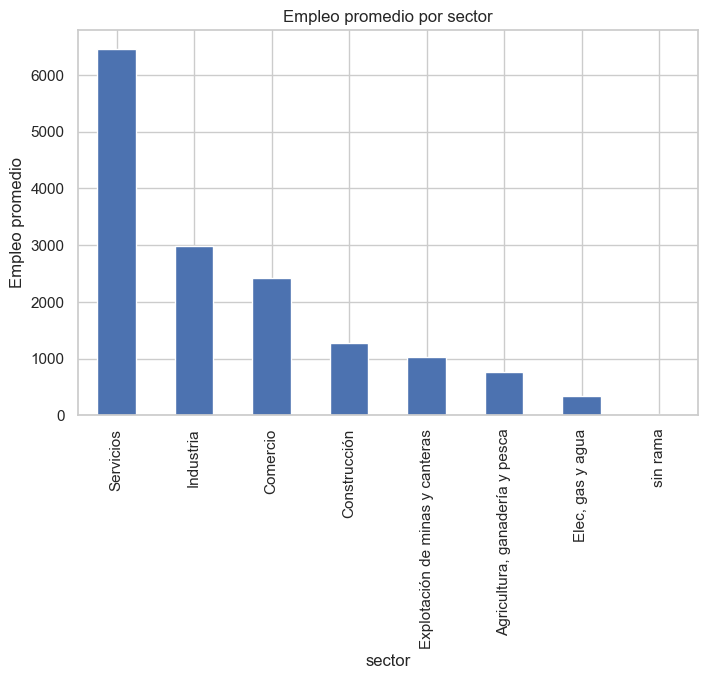


🔗 Correlación entre empleo y salarios:
            empleo  salarios
empleo    1.000000  0.036437
salarios  0.036437  1.000000


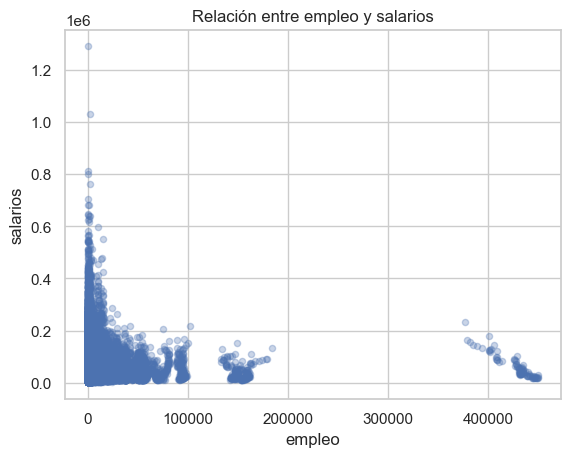


📈 Promedios de empleo y salarios según tratamiento:
                  empleo      salarios
dep_tratado                           
0            2696.014936  36700.981191
1            2297.340356  41273.875045


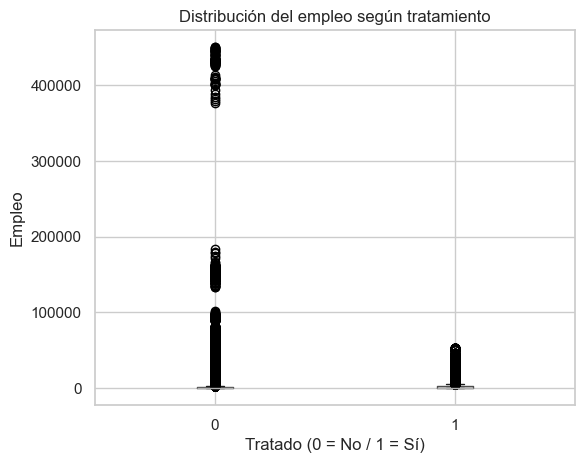


🌍 Empleo promedio por provincia y grupo tratado:
dep_tratado                                 0            1
desc_provincia                                            
BUENOS AIRES                      2814.533947  2974.728846
CATAMARCA                          591.127980   187.770106
CHACO                              838.279753   312.097619
CHUBUT                             217.224267  4180.883235
CIUDAD AUTONOMA DE BUENOS AIRES  16574.856758          NaN
CORDOBA                           5411.081636  2359.686281
CORRIENTES                         717.708489   857.152326
ENTRE RIOS                        1506.460028          NaN
FORMOSA                            213.674289  1969.711905
JUJUY                             1159.546392   426.560976
LA PAMPA                           416.136427   217.860058
LA RIOJA                           624.906015   825.226190
MENDOZA                           2978.634880  1901.859296
MISIONES                          1368.189468   759.722944
NEUQUE

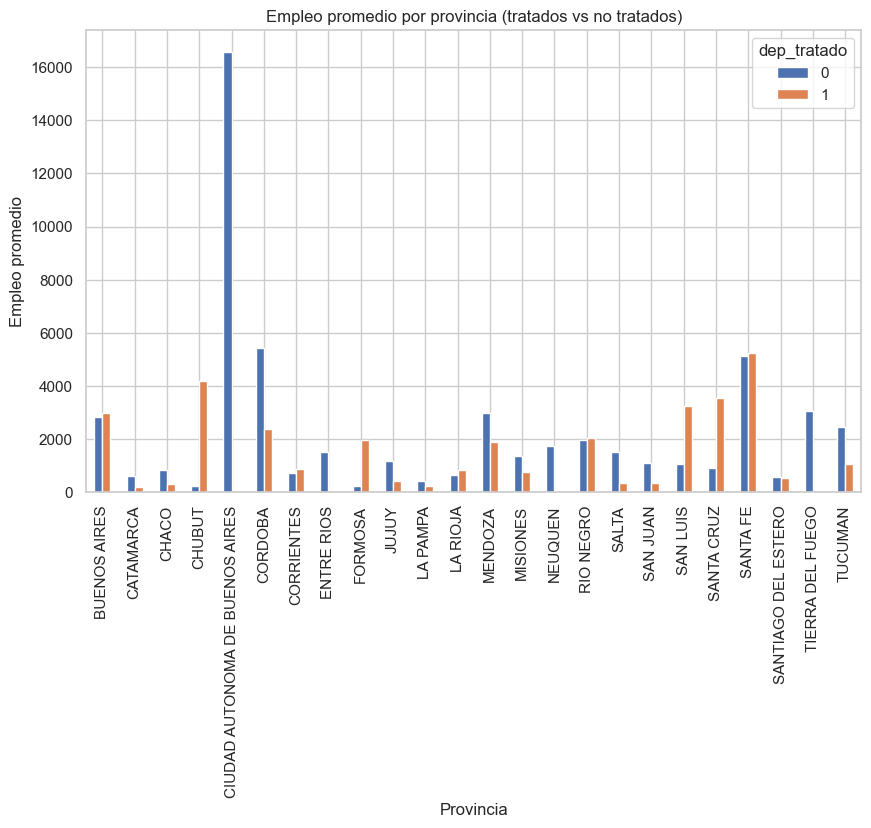

In [13]:
# ============================================================
# ANÁLISIS DESCRIPTIVO DEL DATASET DE EMPLEO Y SALARIOS
# ============================================================

import matplotlib.pyplot as plt
import pandas as pd

# ------------------------------------------------------------
# 1. ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
# ------------------------------------------------------------
# Muestran la media, desviación estándar, mínimos, máximos y cuartiles
print("📊 Estadísticas generales de empleo y salarios:")
print(empleo[['empleo', 'salarios']].describe())

# ------------------------------------------------------------
# 2. ESTADÍSTICAS DESCRIPTIVAS POR GRUPO (TRATADOS vs NO TRATADOS)
# ------------------------------------------------------------
print("\n📈 Estadísticas descriptivas según grupo tratado:")
print(empleo.groupby('dep_tratado')[['empleo', 'salarios']].describe())

# ------------------------------------------------------------
# 3. DISTRIBUCIÓN DE DEPARTAMENTOS TRATADOS Y NO TRATADOS
# ------------------------------------------------------------
print("\n📍 Cantidad de departamentos tratados y no tratados:")
print(empleo['dep_tratado'].value_counts())

# ------------------------------------------------------------
# 4. ANÁLISIS TERRITORIAL - EMPLEO PROMEDIO POR PROVINCIA
# ------------------------------------------------------------
empleo_prov = empleo.groupby('desc_provincia')['empleo'].mean().sort_values(ascending=False)
print("\n🏙️ Empleo promedio por provincia:")
print(empleo_prov)

# Visualización
empleo_prov.plot(kind='barh', figsize=(8,6), title='Empleo promedio por provincia')
plt.xlabel("Empleo promedio")
plt.ylabel("Provincia")
plt.show()

# ------------------------------------------------------------
# 5. ANÁLISIS TERRITORIAL - SALARIOS PROMEDIO POR PROVINCIA
# ------------------------------------------------------------
salario_prov = empleo.groupby('desc_provincia')['salarios'].mean().sort_values(ascending=False)
print("\n💰 Salarios promedio por provincia:")
print(salario_prov)

# Visualización
salario_prov.plot(kind='barh', figsize=(8,6), color='orange', title='Salarios promedio por provincia')
plt.xlabel("Salario promedio")
plt.ylabel("Provincia")
plt.show()

# ------------------------------------------------------------
# 6. ANÁLISIS TEMPORAL
# ------------------------------------------------------------
# Promedio de empleo por período
empleo_periodo = empleo.groupby('periodo')['empleo'].mean()
empleo_periodo.plot(figsize=(8,5), title='Evolución del empleo promedio')
plt.ylabel("Empleo promedio")
plt.show()

# Comparación entre tratados y no tratados a lo largo del tiempo
empleo.groupby(['periodo', 'dep_tratado'])['empleo'].mean().unstack().plot(figsize=(8,5))
plt.title("Evolución del empleo promedio - Tratados vs No tratados")
plt.ylabel("Empleo promedio")
plt.legend(["No tratados", "Tratados"])
plt.show()

# ------------------------------------------------------------
# 7. ANÁLISIS SECTORIAL
# ------------------------------------------------------------
# Empleo y salarios promedio por sector
empleo_sector = empleo.groupby('sector')[['empleo', 'salarios']].mean().sort_values(by='empleo', ascending=False)
print("\n🏭 Promedio de empleo y salarios por sector:")
print(empleo_sector)

# Visualización de empleo promedio por sector
empleo_sector['empleo'].plot(kind='bar', figsize=(8,5), title='Empleo promedio por sector')
plt.ylabel("Empleo promedio")
plt.show()

# ------------------------------------------------------------
# 8. RELACIÓN ENTRE EMPLEO Y SALARIOS
# ------------------------------------------------------------
print("\n🔗 Correlación entre empleo y salarios:")
print(empleo[['empleo','salarios']].corr())

# Gráfico de dispersión
empleo.plot.scatter(x='empleo', y='salarios', alpha=0.3, title='Relación entre empleo y salarios')
plt.show()

# ------------------------------------------------------------
# 9. DIFERENCIAS ENTRE TRATADOS Y NO TRATADOS
# ------------------------------------------------------------
promedios = empleo.groupby('dep_tratado')[['empleo', 'salarios']].mean()
print("\n📈 Promedios de empleo y salarios según tratamiento:")
print(promedios)

# Boxplot de empleo
empleo.boxplot(column='empleo', by='dep_tratado', figsize=(6,5))
plt.title("Distribución del empleo según tratamiento")
plt.suptitle("")
plt.xlabel("Tratado (0 = No / 1 = Sí)")
plt.ylabel("Empleo")
plt.show()

# ------------------------------------------------------------
# 10. DIFERENCIAS REGIONALES ENTRE TRATADOS Y NO TRATADOS
# ------------------------------------------------------------
# Empleo promedio por provincia y tratamiento
empleo_prov_trat = empleo.groupby(['desc_provincia', 'dep_tratado'])['empleo'].mean().unstack()
print("\n🌍 Empleo promedio por provincia y grupo tratado:")
print(empleo_prov_trat)

# Visualización (puede ser útil para el informe)
empleo_prov_trat.plot(kind='bar', figsize=(10,6), title='Empleo promedio por provincia (tratados vs no tratados)')
plt.ylabel("Empleo promedio")
plt.xlabel("Provincia")
plt.show()


In [39]:
# --------------------------------------------
# Crear variable ln_empleo (logaritmo natural del empleo)
# --------------------------------------------
import numpy as np

empleo['ln_empleo'] = np.log(empleo['empleo'])

# --------------------------------------------
# Separar año y mes a partir del campo 'periodo'
# (Ejemplo: 201712 -> año=2017, mes=12)
# --------------------------------------------
empleo['anio'] = (empleo['periodo'] // 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)

# --------------------------------------------
# Crear variable mes tipo fecha (equivalente a ym en Stata)
# --------------------------------------------
empleo['mes_stata'] = pd.to_datetime(empleo['anio'].astype(str) + '-' + empleo['mes'].astype(str) + '-01')

# --------------------------------------------
# Crear variable de trimestre (equivalente a yq en Stata)
# ceil(mes/3) redondea al trimestre siguiente
# --------------------------------------------
empleo['trimestre'] = empleo['anio'].astype(str) + 'Q' + np.ceil(empleo['mes'] / 3).astype(int).astype(str)

# --------------------------------------------
# Verificar conteo de observaciones por trimestre
# --------------------------------------------
print(empleo['trimestre'].value_counts().sort_index())


trimestre
2015Q1    10482
2015Q2    10482
2015Q3    10482
2015Q4    10482
2016Q1    10482
2016Q2    10482
2016Q3    10482
2016Q4    10482
2017Q1    10482
2017Q2    10482
2017Q3    10482
2017Q4    10482
2018Q1    10482
2018Q2    10482
2018Q3    10482
2018Q4    10482
2019Q1    10482
2019Q2    10482
2019Q3    10482
2019Q4    10482
2020Q1    10482
2020Q2    10482
2020Q3    10482
2020Q4    10482
2021Q1    10482
2021Q2    10482
2021Q3    10482
2021Q4    10482
Name: count, dtype: int64


In [16]:
import numpy as np
import pandas as pd

# Asegurar que 'periodo' sea numérico
empleo['periodo'] = pd.to_numeric(empleo['periodo'], errors='coerce')

# Crear variables de año y mes
empleo['anio'] = np.floor(empleo['periodo'] / 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)

# Crear variable trimestre (como 2015Q1, 2015Q2, etc.)
empleo['trimestre'] = empleo.apply(lambda x: f"{x['anio']}Q{int(np.ceil(x['mes'] / 3))}", axis=1)

# Verificar
empleo[['periodo', 'anio', 'mes', 'trimestre']].head()


,periodo,anio,mes,trimestre
0,201501,2015,1,2015Q1
1,201502,2015,2,2015Q1
2,201503,2015,3,2015Q1
3,201504,2015,4,2015Q2
4,201505,2015,5,2015Q2


===== Estadísticas descriptivas de EMPLEO (nivel) =====
count    203148.000000
mean       2627.267180
std       11738.590369
min           3.000000
25%         111.000000
50%         379.000000
75%        1449.000000
max      450252.000000
Name: empleo, dtype: float64

===== Estadísticas de EMPLEO por dep_tratado =====
                count         mean           std  min    25%    50%     75%  \
dep_tratado                                                                   
0            168117.0  2696.014936  12706.005480  3.0  102.0  339.0  1329.0   
1             35031.0  2297.340356   4916.813993  3.0  178.5  710.0  2430.0   

                  max  
dep_tratado            
0            450252.0  
1             53346.0  


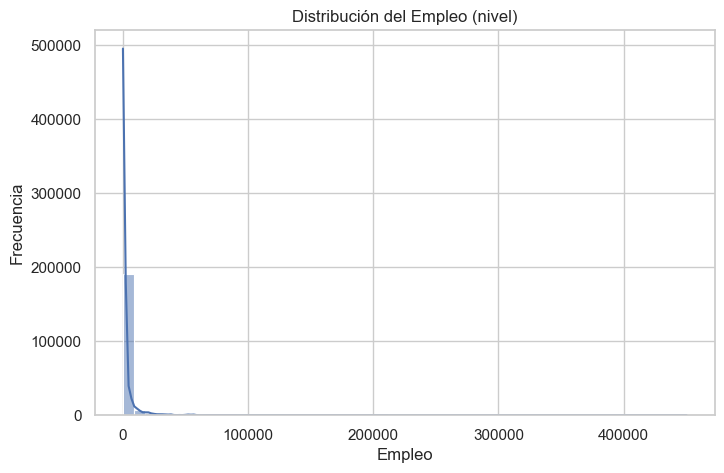


===== Estadísticas descriptivas de ln(EMPLEO) =====
count    203148.000000
mean          6.025645
std           1.906476
min           1.098612
25%           4.709530
50%           5.937536
75%           7.278629
max          13.017563
Name: ln_empleo, dtype: float64

===== Estadísticas de ln(EMPLEO) por dep_tratado =====
                count      mean       std       min       25%       50%  \
dep_tratado                                                               
0            168117.0  5.937476  1.927422  1.098612  4.624973  5.826000   
1             35031.0  6.448773  1.741550  1.098612  5.184585  6.565265   

                  75%        max  
dep_tratado                       
0            7.192182  13.017563  
1            7.795647  10.884554  


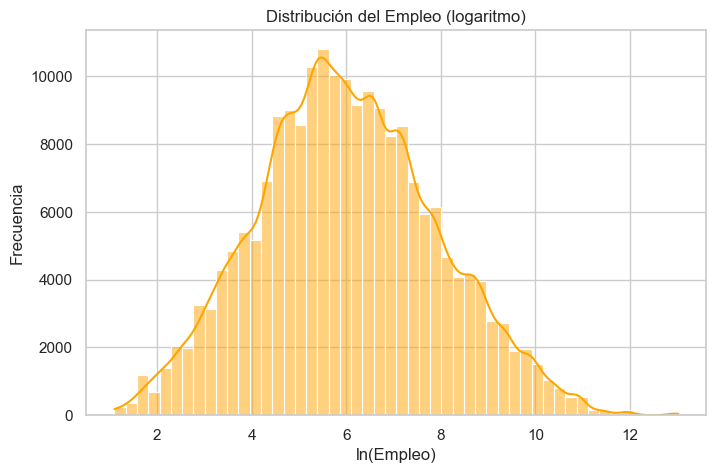


===== Empleo promedio por trimestre =====
trimestre
2015Q1    2628.520589
2015Q2    2636.615364
2015Q3    2639.500545
2015Q4    2651.437977
2016Q1    2656.422799
2016Q2    2626.692413
2016Q3    2627.220027
2016Q4    2657.831292
2017Q1    2652.997544
2017Q2    2650.169319
2017Q3    2659.500549
2017Q4    2686.199726
2018Q1    2710.360500
2018Q2    2686.539860
2018Q3    2663.715798
2018Q4    2650.082487
2019Q1    2660.824185
2019Q2    2633.710835
2019Q3    2622.249551
2019Q4    2610.836678
2020Q1    2603.514799
2020Q2    2510.627029
2020Q3    2505.411576
2020Q4    2533.581795
2021Q1    2575.522321
2021Q2    2589.213515
2021Q3    2594.305719
2021Q4    2632.520191
Name: empleo, dtype: float64

===== Empleo total por provincia =====
desc_provincia
BUENOS AIRES                       170665098.0
CIUDAD AUTONOMA DE BUENOS AIRES    129134709.0
SANTA FE                            46243773.0
CORDOBA                             44400014.0
MENDOZA                             20723235.0
TUCUMAN     

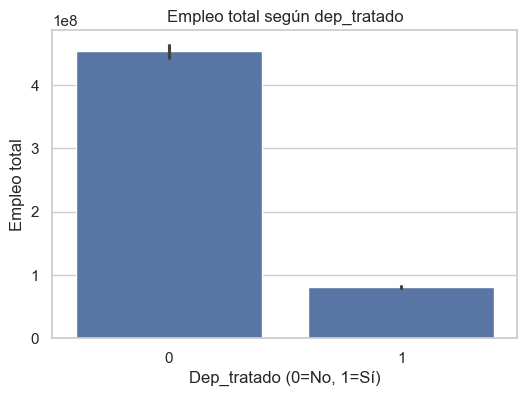

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------------------------
# 1️⃣ Estadísticas descriptivas básicas (nivel de empleo)
# ------------------------------------------------
print("===== Estadísticas descriptivas de EMPLEO (nivel) =====")
print(empleo['empleo'].describe())  # media, std, min, max, cuartiles

# Por departamento tratado / no tratado
print("\n===== Estadísticas de EMPLEO por dep_tratado =====")
print(empleo.groupby('dep_tratado')['empleo'].describe())

# Histograma del empleo
plt.figure(figsize=(8,5))
sns.histplot(empleo['empleo'], bins=50, kde=True)
plt.title("Distribución del Empleo (nivel)")
plt.xlabel("Empleo")
plt.ylabel("Frecuencia")
plt.show()

# ------------------------------------------------
# 2️⃣ Estadísticas descriptivas del logaritmo del empleo
# ------------------------------------------------
# Crear ln_empleo si no existe
if 'ln_empleo' not in empleo.columns:
    empleo['ln_empleo'] = empleo['empleo'].apply(lambda x: np.log(x) if x>0 else None)

print("\n===== Estadísticas descriptivas de ln(EMPLEO) =====")
print(empleo['ln_empleo'].describe())

# Por departamento tratado / no tratado
print("\n===== Estadísticas de ln(EMPLEO) por dep_tratado =====")
print(empleo.groupby('dep_tratado')['ln_empleo'].describe())

# Histograma del ln_empleo
plt.figure(figsize=(8,5))
sns.histplot(empleo['ln_empleo'], bins=50, kde=True, color='orange')
plt.title("Distribución del Empleo (logaritmo)")
plt.xlabel("ln(Empleo)")
plt.ylabel("Frecuencia")
plt.show()

# ------------------------------------------------
# 3️⃣ Estadísticas adicionales útiles
# ------------------------------------------------
# Empleo promedio por trimestre
print("\n===== Empleo promedio por trimestre =====")
print(empleo.groupby('trimestre')['empleo'].mean())

# Empleo total por provincia
print("\n===== Empleo total por provincia =====")
print(empleo.groupby('desc_provincia')['empleo'].sum().sort_values(ascending=False))

# Gráfico de barras: empleo promedio por dep_tratado
plt.figure(figsize=(6,4))
sns.barplot(x='dep_tratado', y='empleo', data=empleo, estimator=sum)
plt.title("Empleo total según dep_tratado")
plt.xlabel("Dep_tratado (0=No, 1=Sí)")
plt.ylabel("Empleo total")
plt.show()


In [23]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------
# 1️⃣ Crear logaritmo natural del empleo
# ------------------------------------------------------------
empleo['ln_empleo'] = np.log(empleo['empleo'])

# ------------------------------------------------------------
# 2️⃣ Extraer año y mes del período (ejemplo: 201503 → 2015, 03)
# ------------------------------------------------------------
empleo['anio'] = (empleo['periodo'] // 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)

# ------------------------------------------------------------
# 3️⃣ Crear variable tipo trimestre (formato 2015Q1, 2015Q2, etc.)
# ------------------------------------------------------------
empleo['trimestre_num'] = np.ceil(empleo['mes'] / 3).astype(int)
empleo['trimestre'] = empleo['anio'].astype(str) + 'Q' + empleo['trimestre_num'].astype(str)

# ------------------------------------------------------------
# 4️⃣ Replicar el “tab trimestre” de Stata
# ------------------------------------------------------------
tab_trimestre = (
    empleo['trimestre']
    .value_counts()
    .sort_index()
    .reset_index()
)
tab_trimestre.columns = ['trimestre', 'Frecuencia']

# Calcular porcentaje y acumulado
tab_trimestre['Porcentaje'] = round(tab_trimestre['Frecuencia'] / tab_trimestre['Frecuencia'].sum() * 100, 2)
tab_trimestre['Acumulado'] = tab_trimestre['Porcentaje'].cumsum()

# ------------------------------------------------------------
# 5️⃣ Mostrar tabla
# ------------------------------------------------------------
print(tab_trimestre.to_string(index=False))


trimestre  Frecuencia  Porcentaje  Acumulado
   2015Q1       10482        3.57       3.57
   2015Q2       10482        3.57       7.14
   2015Q3       10482        3.57      10.71
   2015Q4       10482        3.57      14.28
   2016Q1       10482        3.57      17.85
   2016Q2       10482        3.57      21.42
   2016Q3       10482        3.57      24.99
   2016Q4       10482        3.57      28.56
   2017Q1       10482        3.57      32.13
   2017Q2       10482        3.57      35.70
   2017Q3       10482        3.57      39.27
   2017Q4       10482        3.57      42.84
   2018Q1       10482        3.57      46.41
   2018Q2       10482        3.57      49.98
   2018Q3       10482        3.57      53.55
   2018Q4       10482        3.57      57.12
   2019Q1       10482        3.57      60.69
   2019Q2       10482        3.57      64.26
   2019Q3       10482        3.57      67.83
   2019Q4       10482        3.57      71.40
   2020Q1       10482        3.57      74.97
   2020Q2 

In [25]:
import pandas as pd
import numpy as np

# =====================================================
# 🔹 CREACIÓN DE VARIABLES COMO EN STATA
# =====================================================

# Logaritmo natural del empleo
empleo['ln_empleo'] = np.log(empleo['empleo'])

# Año y mes a partir del período (ej. 201503 → 2015, 03)
empleo['anio'] = (empleo['periodo'] // 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)

# Trimestre con método recomendado por pandas (sin warning)
empleo['trimestre'] = pd.PeriodIndex.from_fields(
    year=empleo['anio'], quarter=np.ceil(empleo['mes'] / 3).astype(int), freq='Q'
).astype(str)

# =====================================================
# 🔹 ESTADÍSTICAS DESCRIPTIVAS
# =====================================================
print("=== Estadísticas descriptivas generales ===")
print(empleo[['empleo', 'ln_empleo', 'salarios']].describe().round(3))

# Promedio por tratamiento
print("\n=== Empleo promedio por dep_tratado ===")
print(empleo.groupby('dep_tratado')[['empleo', 'ln_empleo', 'salarios']].mean().round(3))

# Promedio por sector
print("\n=== Empleo promedio por sector ===")
print(empleo.groupby('sector')[['empleo', 'ln_empleo', 'salarios']].mean().round(3))

# =====================================================
# 🔹 FRECUENCIAS (como tab en Stata)
# =====================================================
def tab_var(df, var):
    tab = (
        df[var].value_counts(normalize=False)
        .rename("Frecuencia")
        .reset_index()
        .rename(columns={"index": var})
        .sort_values(by=var)
    )
    tab["Porcentaje (%)"] = round(tab["Frecuencia"] / tab["Frecuencia"].sum() * 100, 6)
    tab = tab.set_index(var)
    print(f"\n=== Frecuencia de {var} ===")
    print(tab)
    return tab

# Aplicar para cada variable categórica relevante
tab_dep_tratado = tab_var(empleo, 'dep_tratado')
tab_sector = tab_var(empleo, 'sector')
tab_provincia = tab_var(empleo, 'desc_provincia')
tab_trimestre = tab_var(empleo, 'trimestre')


=== Estadísticas descriptivas generales ===
           empleo   ln_empleo     salarios
count  203148.000  203148.000   203148.000
mean     2627.267       6.026    37489.535
std     11738.590       1.906    37016.180
min         3.000       1.099     1227.500
25%       111.000       4.710    14922.006
50%       379.000       5.938    25900.002
75%      1449.000       7.279    47573.226
max    450252.000      13.018  1289383.300

=== Empleo promedio por dep_tratado ===
               empleo  ln_empleo   salarios
dep_tratado                                
0            2696.015      5.937  36700.981
1            2297.340      6.449  41273.875

=== Empleo promedio por sector ===
                                   empleo  ln_empleo   salarios
sector                                                         
Agricultura, ganadería y pesca    758.239      5.716  27065.602
Comercio                         2415.142      6.227  32502.001
Construcción                     1275.582      5.745  31547.

=== Estadísticas descriptivas generales ===
              empleo      ln_empleo      salarios
count  203148.000000  203148.000000  2.031480e+05
mean     2627.267180       6.036650  3.748953e+04
std     11738.590369       1.890658  3.701618e+04
min         3.000000       1.386294  1.227500e+03
25%       111.000000       4.718499  1.492201e+04
50%       379.000000       5.940171  2.590000e+04
75%      1449.000000       7.279319  4.757323e+04
max    450252.000000      13.017565  1.289383e+06

=== Empleo promedio por dep_tratado ===
                  empleo  ln_empleo      salarios
dep_tratado                                      
0            2696.014936   5.949331  36700.981191
1            2297.340356   6.455700  41273.875045

=== Empleo promedio por sector ===
                                      empleo  ln_empleo      salarios
sector                                                               
Agricultura, ganadería y pesca    758.238545   5.726628  27065.601599
Comercio           

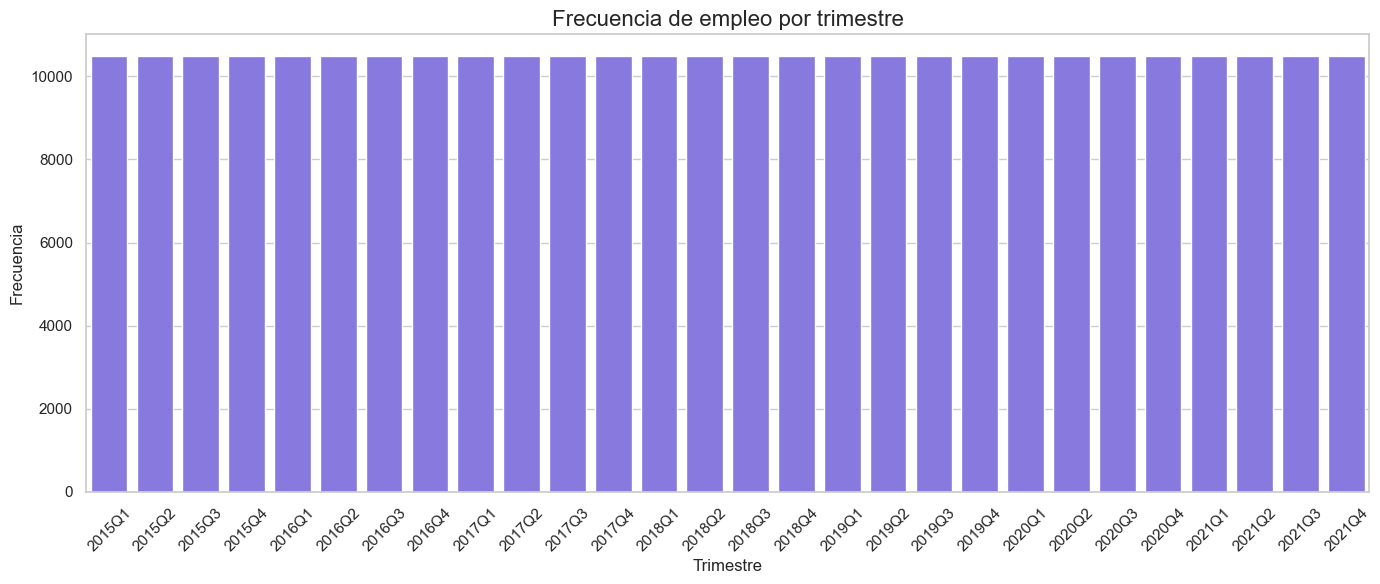

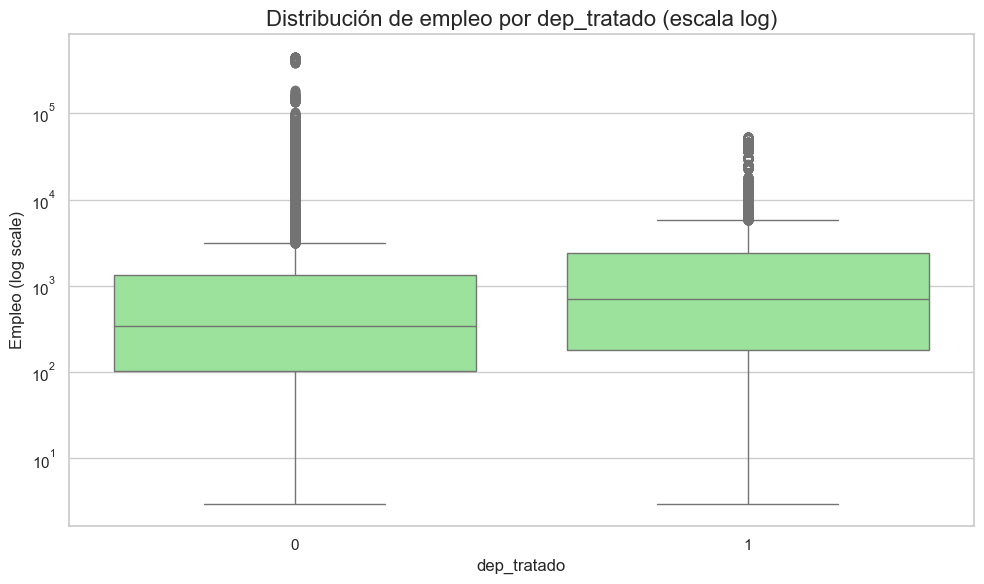

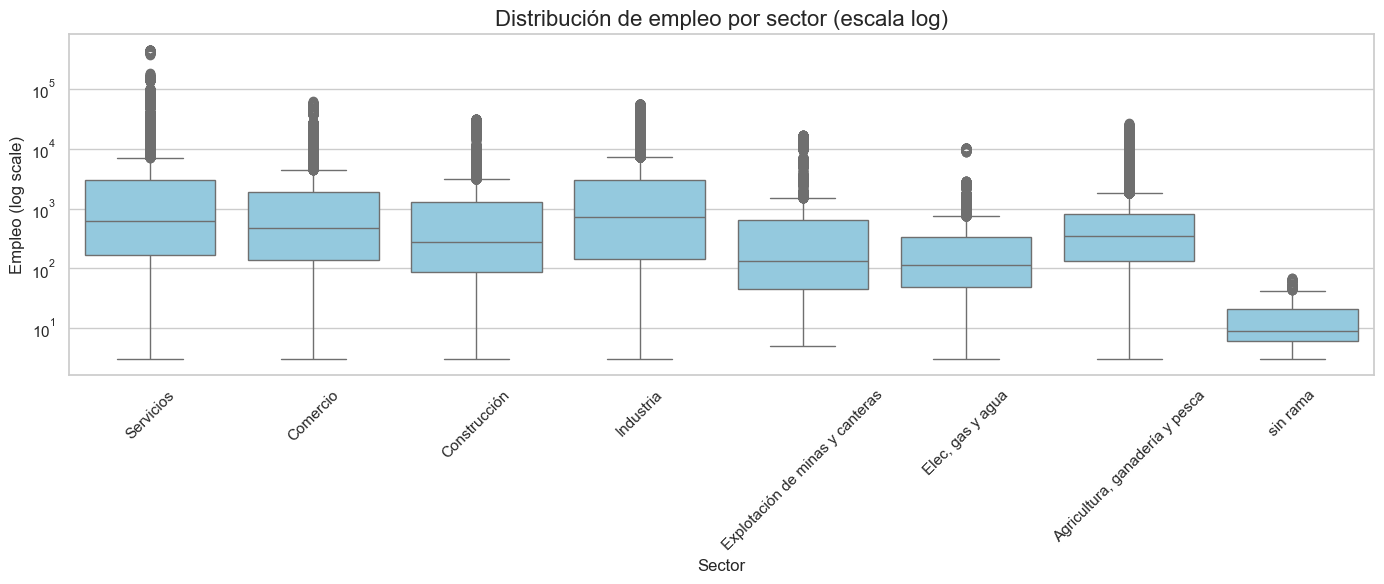

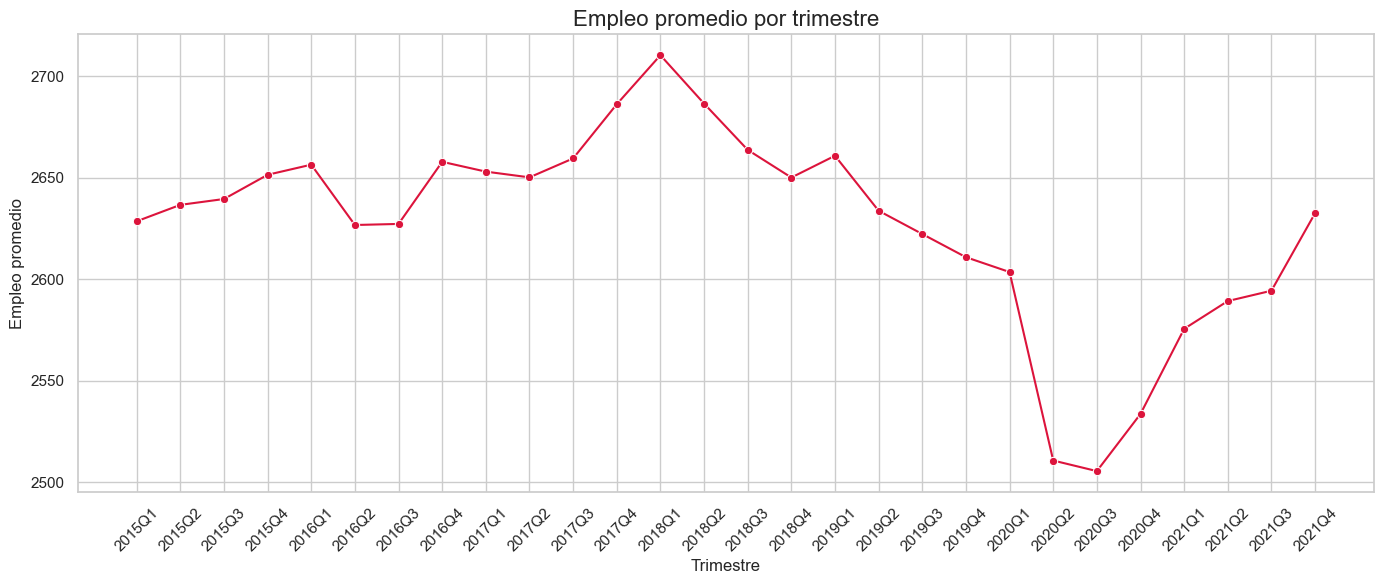

In [28]:
# -----------------------------
# Estadísticas descriptivas y visualización mejoradas
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# Asegurarse que la columna 'empleo' es numérica
empleo['empleo'] = pd.to_numeric(empleo['empleo'], errors='coerce')

# 1️⃣ Crear logaritmo natural del empleo (+1 para evitar log(0))
empleo['ln_empleo'] = np.log(empleo['empleo'] + 1)

# 2️⃣ Extraer año, mes y trimestre
empleo['anio'] = (empleo['periodo'] // 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)
empleo['trimestre'] = empleo['anio'].astype(str) + 'Q' + ((empleo['mes']-1)//3 + 1).astype(str)

# 3️⃣ Estadísticas descriptivas generales
print("=== Estadísticas descriptivas generales ===")
print(empleo[['empleo', 'ln_empleo', 'salarios']].describe())

# 4️⃣ Promedios por dep_tratado
print("\n=== Empleo promedio por dep_tratado ===")
print(empleo.groupby('dep_tratado')[['empleo','ln_empleo','salarios']].mean())

# 5️⃣ Promedios por sector
print("\n=== Empleo promedio por sector ===")
print(empleo.groupby('sector')[['empleo','ln_empleo','salarios']].mean())

# 6️⃣ Tablas de frecuencia
def frecuencia(df, columna):
    tab = df[columna].value_counts().sort_index().reset_index()
    tab.columns = [columna, 'Frecuencia']
    tab['Porcentaje'] = (tab['Frecuencia'] / tab['Frecuencia'].sum()) * 100
    tab['Acumulado'] = tab['Porcentaje'].cumsum()
    return tab

print("\n=== Frecuencia dep_tratado ===")
print(frecuencia(empleo, 'dep_tratado'))

print("\n=== Frecuencia sector ===")
print(frecuencia(empleo, 'sector'))

print("\n=== Frecuencia desc_provincia ===")
print(frecuencia(empleo, 'desc_provincia'))

print("\n=== Frecuencia trimestre ===")
print(frecuencia(empleo, 'trimestre'))

# -----------------------------
# Visualizaciones sin warnings
# -----------------------------

# 1️⃣ Countplot por trimestre
plt.figure(figsize=(14,6))
sns.countplot(x='trimestre', data=empleo, color='mediumslateblue')
plt.xticks(rotation=45)
plt.title("Frecuencia de empleo por trimestre", fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

# 2️⃣ Boxplot por dep_tratado
plt.figure(figsize=(10,6))
sns.boxplot(x='dep_tratado', y='empleo', data=empleo, color='lightgreen')
plt.yscale('log')
plt.title("Distribución de empleo por dep_tratado (escala log)", fontsize=16)
plt.xlabel("dep_tratado", fontsize=12)
plt.ylabel("Empleo (log scale)", fontsize=12)
plt.tight_layout()
plt.show()

# 3️⃣ Boxplot por sector
plt.figure(figsize=(14,6))
sns.boxplot(x='sector', y='empleo', data=empleo, color='skyblue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Distribución de empleo por sector (escala log)", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Empleo (log scale)", fontsize=12)
plt.tight_layout()
plt.show()

# 4️⃣ Lineplot de empleo promedio por trimestre
empleo_trimestre = empleo.groupby('trimestre')['empleo'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x='trimestre', y='empleo', data=empleo_trimestre, marker='o', color='crimson')
plt.xticks(rotation=45)
plt.title("Empleo promedio por trimestre", fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Empleo promedio", fontsize=12)
plt.tight_layout()
plt.show()


=== Estadísticas descriptivas generales ===
              empleo      ln_empleo      salarios
count  203148.000000  203148.000000  2.031480e+05
mean     2627.267180       6.036650  3.748953e+04
std     11738.590369       1.890658  3.701618e+04
min         3.000000       1.386294  1.227500e+03
25%       111.000000       4.718499  1.492201e+04
50%       379.000000       5.940171  2.590000e+04
75%      1449.000000       7.279319  4.757323e+04
max    450252.000000      13.017565  1.289383e+06

=== Empleo promedio por dep_tratado ===
                  empleo  ln_empleo      salarios
dep_tratado                                      
0            2696.014936   5.949331  36700.981191
1            2297.340356   6.455700  41273.875045

=== Empleo promedio por sector ===
                                      empleo  ln_empleo      salarios
sector                                                               
Agricultura, ganadería y pesca    758.238545   5.726628  27065.601599
Comercio           

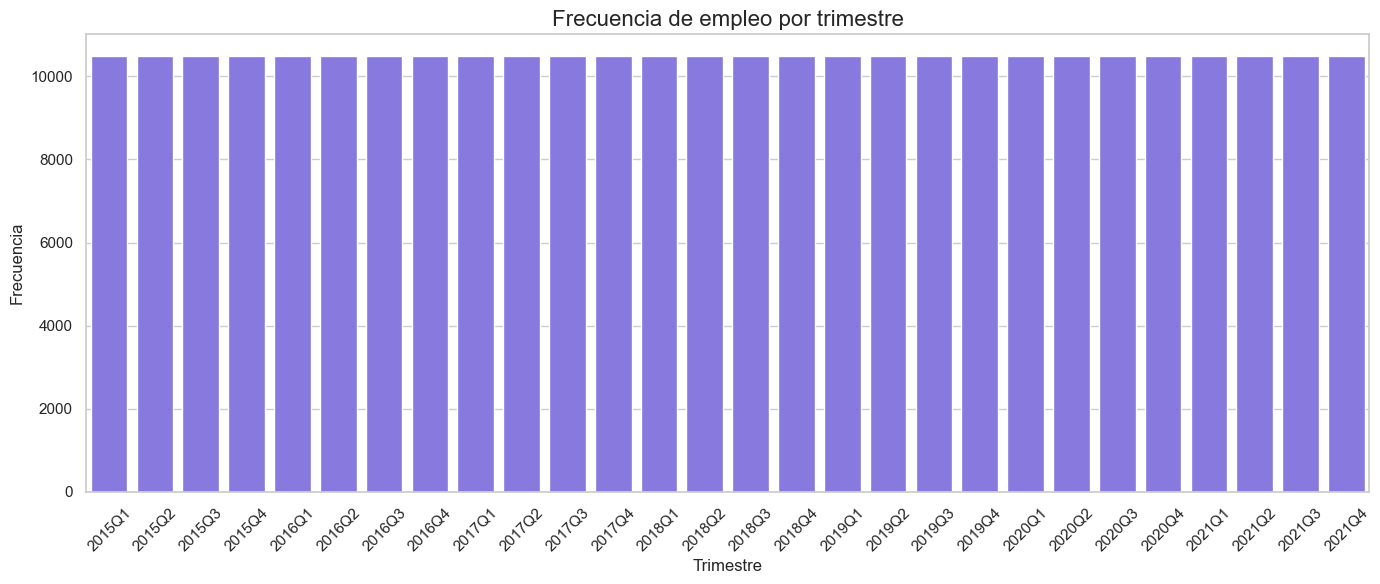

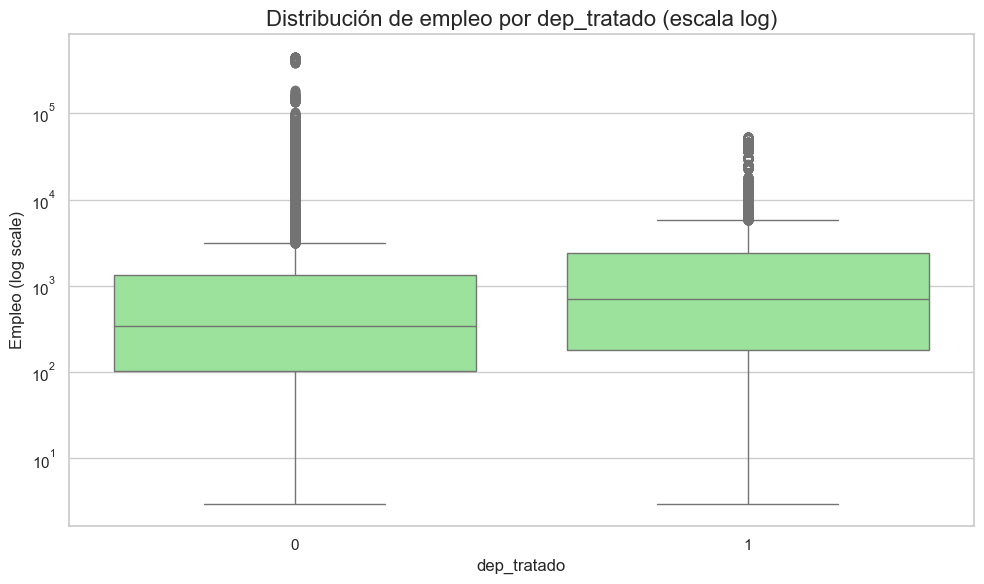

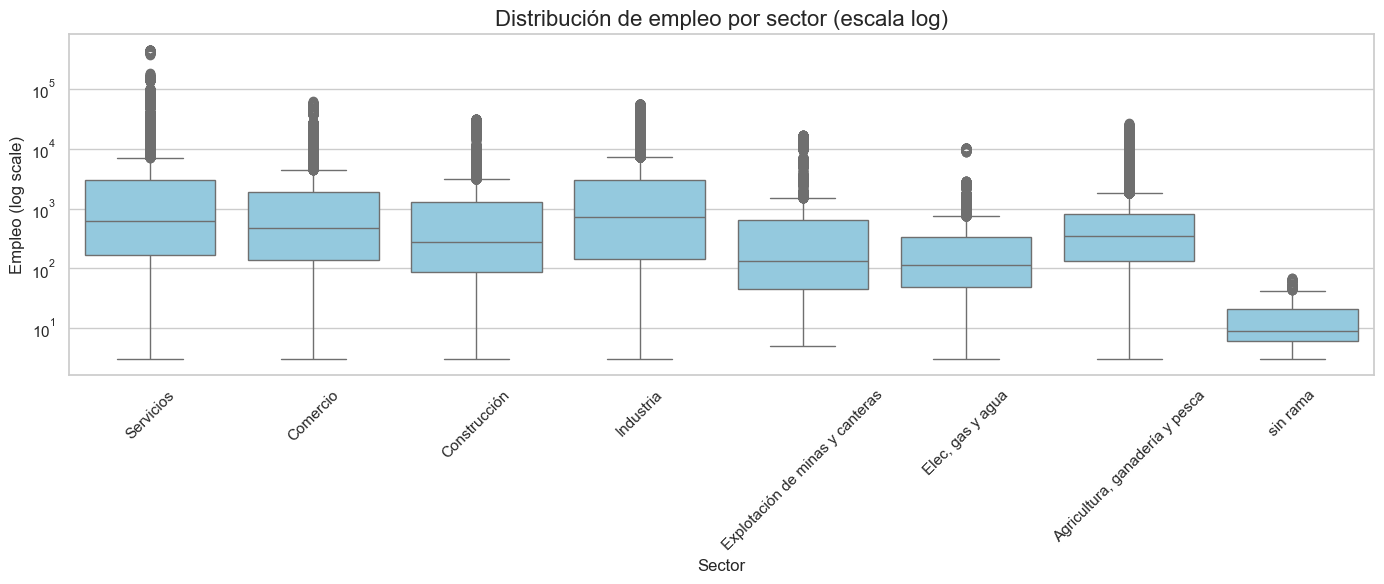

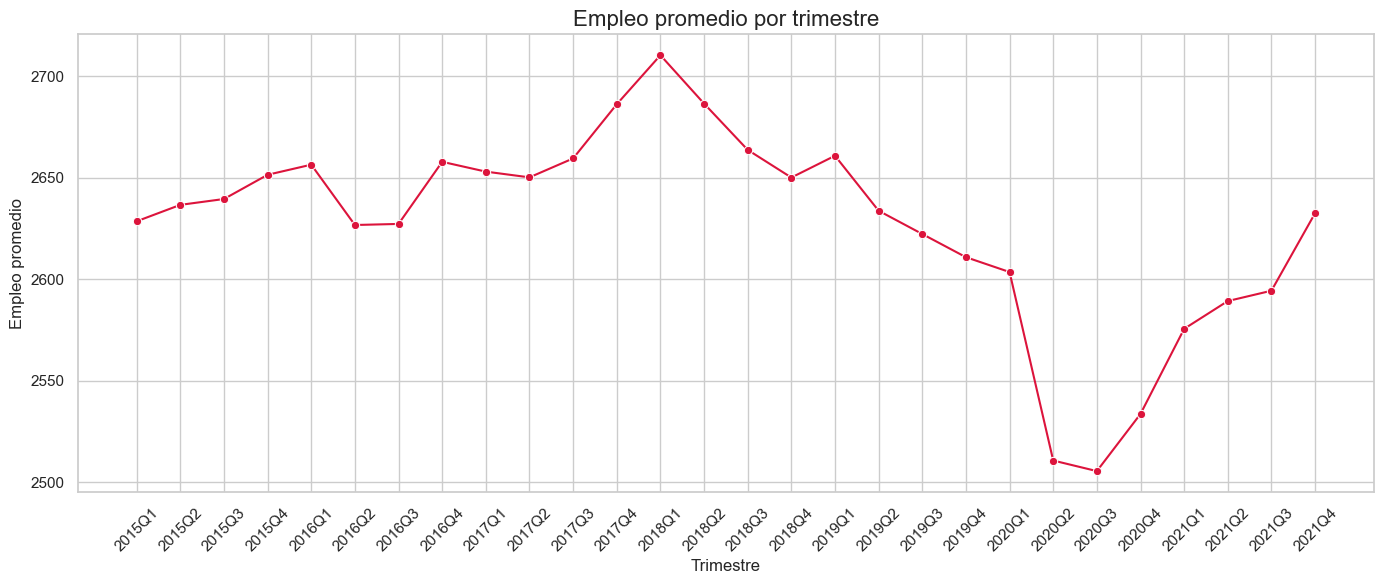

In [32]:
# -----------------------------
# Estadísticas descriptivas y visualización mejorada
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurarse que la columna 'empleo' es numérica
empleo['empleo'] = pd.to_numeric(empleo['empleo'], errors='coerce')

# 1️⃣ Crear logaritmo natural del empleo (+1 para evitar log(0))
empleo['ln_empleo'] = np.log(empleo['empleo'] + 1)

# 2️⃣ Extraer año, mes y trimestre
empleo['anio'] = (empleo['periodo'] // 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)
empleo['trimestre'] = empleo['anio'].astype(str) + 'Q' + ((empleo['mes']-1)//3 + 1).astype(str)

# 3️⃣ Estadísticas descriptivas generales
print("=== Estadísticas descriptivas generales ===")
print(empleo[['empleo', 'ln_empleo', 'salarios']].describe())

# 4️⃣ Promedios por dep_tratado
print("\n=== Empleo promedio por dep_tratado ===")
print(empleo.groupby('dep_tratado')[['empleo','ln_empleo','salarios']].mean())

# 5️⃣ Promedios por sector
print("\n=== Empleo promedio por sector ===")
print(empleo.groupby('sector')[['empleo','ln_empleo','salarios']].mean())

# 6️⃣ Tablas de frecuencia
def frecuencia(df, columna):
    tab = df[columna].value_counts().sort_index().reset_index()
    tab.columns = [columna, 'Frecuencia']
    tab['Porcentaje'] = (tab['Frecuencia'] / tab['Frecuencia'].sum()) * 100
    tab['Acumulado'] = tab['Porcentaje'].cumsum()
    return tab

print("\n=== Frecuencia dep_tratado ===")
print(frecuencia(empleo, 'dep_tratado'))

print("\n=== Frecuencia sector ===")
print(frecuencia(empleo, 'sector'))

print("\n=== Frecuencia desc_provincia ===")
print(frecuencia(empleo, 'desc_provincia'))

print("\n=== Frecuencia trimestre ===")
print(frecuencia(empleo, 'trimestre'))

# -----------------------------
# Estadísticas específicas para gráficos
# -----------------------------
# Empleo por dep_tratado
empleo_dep = empleo.groupby('dep_tratado')[['empleo','ln_empleo']].describe()
print("\n=== Estadísticas por dep_tratado ===")
print(empleo_dep)

# Empleo por sector
empleo_sector = empleo.groupby('sector')[['empleo','ln_empleo']].describe()
print("\n=== Estadísticas por sector ===")
print(empleo_sector)

# Empleo por trimestre
empleo_trimestre = empleo.groupby('trimestre')[['empleo','ln_empleo']].describe()
print("\n=== Estadísticas por trimestre ===")
print(empleo_trimestre)

# -----------------------------
# Visualizaciones sin warnings
# -----------------------------
sns.set(style="whitegrid")

# 1️⃣ Countplot por trimestre
plt.figure(figsize=(14,6))
sns.countplot(x='trimestre', data=empleo, color='mediumslateblue')
plt.xticks(rotation=45)
plt.title("Frecuencia de empleo por trimestre", fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

# 2️⃣ Boxplot por dep_tratado (escala log)
plt.figure(figsize=(10,6))
sns.boxplot(x='dep_tratado', y='empleo', data=empleo, color='lightgreen')
plt.yscale('log')
plt.title("Distribución de empleo por dep_tratado (escala log)", fontsize=16)
plt.xlabel("dep_tratado", fontsize=12)
plt.ylabel("Empleo (log scale)", fontsize=12)
plt.tight_layout()
plt.show()

# 3️⃣ Boxplot por sector (escala log)
plt.figure(figsize=(14,6))
sns.boxplot(x='sector', y='empleo', data=empleo, color='skyblue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Distribución de empleo por sector (escala log)", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Empleo (log scale)", fontsize=12)
plt.tight_layout()
plt.show()

# 4️⃣ Lineplot de empleo promedio por trimestre
empleo_trimestre_mean = empleo.groupby('trimestre')['empleo'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x='trimestre', y='empleo', data=empleo_trimestre_mean, marker='o', color='crimson')
plt.xticks(rotation=45)
plt.title("Empleo promedio por trimestre", fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Empleo promedio", fontsize=12)
plt.tight_layout()
plt.show()


In [33]:
# -----------------------------
# Estadísticas descriptivas y visualización mejorada
# -----------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages

# Asegurarse que la columna 'empleo' es numérica
empleo['empleo'] = pd.to_numeric(empleo['empleo'], errors='coerce')

# 1️⃣ Crear logaritmo natural del empleo (+1 para evitar log(0))
empleo['ln_empleo'] = np.log(empleo['empleo'] + 1)

# 2️⃣ Extraer año, mes y trimestre
empleo['anio'] = (empleo['periodo'] // 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)
empleo['trimestre'] = empleo['anio'].astype(str) + 'Q' + ((empleo['mes']-1)//3 + 1).astype(str)

# 3️⃣ Estadísticas descriptivas generales
print("=== Estadísticas descriptivas generales ===")
print(empleo[['empleo', 'ln_empleo', 'salarios']].describe())

# 4️⃣ Promedios por dep_tratado
print("\n=== Empleo promedio por dep_tratado ===")
print(empleo.groupby('dep_tratado')[['empleo','ln_empleo','salarios']].mean())

# 5️⃣ Promedios por sector
print("\n=== Empleo promedio por sector ===")
print(empleo.groupby('sector')[['empleo','ln_empleo','salarios']].mean())

# 6️⃣ Tablas de frecuencia
def frecuencia(df, columna):
    tab = df[columna].value_counts().sort_index().reset_index()
    tab.columns = [columna, 'Frecuencia']
    tab['Porcentaje'] = (tab['Frecuencia'] / tab['Frecuencia'].sum()) * 100
    tab['Acumulado'] = tab['Porcentaje'].cumsum()
    return tab

print("\n=== Frecuencia dep_tratado ===")
print(frecuencia(empleo, 'dep_tratado'))

print("\n=== Frecuencia sector ===")
print(frecuencia(empleo, 'sector'))

print("\n=== Frecuencia desc_provincia ===")
print(frecuencia(empleo, 'desc_provincia'))

print("\n=== Frecuencia trimestre ===")
print(frecuencia(empleo, 'trimestre'))

# -----------------------------
# Estadísticas específicas para gráficos
# -----------------------------
# Empleo por dep_tratado
empleo_dep = empleo.groupby('dep_tratado')[['empleo','ln_empleo']].describe()
print("\n=== Estadísticas por dep_tratado ===")
print(empleo_dep)

# Empleo por sector
empleo_sector = empleo.groupby('sector')[['empleo','ln_empleo']].describe()
print("\n=== Estadísticas por sector ===")
print(empleo_sector)

# Empleo por trimestre
empleo_trimestre = empleo.groupby('trimestre')[['empleo','ln_empleo']].describe()
print("\n=== Estadísticas por trimestre ===")
print(empleo_trimestre)

# -----------------------------
# Visualizaciones sin warnings y exportación
# -----------------------------
sns.set(style="whitegrid")

# Crear PDF para guardar todos los gráficos
pdf_file = PdfPages("graficos_empleo.pdf")

# 1️⃣ Countplot por trimestre
plt.figure(figsize=(14,6))
sns.countplot(x='trimestre', data=empleo, color='mediumslateblue')
plt.xticks(rotation=45)
plt.title("Frecuencia de empleo por trimestre", fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.savefig("empleo_frecuencia_trimestre.png", dpi=300, bbox_inches='tight')
pdf_file.savefig()
plt.close()

# 2️⃣ Boxplot por dep_tratado (escala log)
plt.figure(figsize=(10,6))
sns.boxplot(x='dep_tratado', y='empleo', data=empleo, color='lightgreen')
plt.yscale('log')
plt.title("Distribución de empleo por dep_tratado (escala log)", fontsize=16)
plt.xlabel("dep_tratado", fontsize=12)
plt.ylabel("Empleo (log scale)", fontsize=12)
plt.tight_layout()
plt.savefig("empleo_dep_tratado.png", dpi=300, bbox_inches='tight')
pdf_file.savefig()
plt.close()

# 3️⃣ Boxplot por sector (escala log)
plt.figure(figsize=(14,6))
sns.boxplot(x='sector', y='empleo', data=empleo, color='skyblue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Distribución de empleo por sector (escala log)", fontsize=16)
plt.xlabel("Sector", fontsize=12)
plt.ylabel("Empleo (log scale)", fontsize=12)
plt.tight_layout()
plt.savefig("empleo_sector.png", dpi=300, bbox_inches='tight')
pdf_file.savefig()
plt.close()

# 4️⃣ Lineplot de empleo promedio por trimestre
empleo_trimestre_mean = empleo.groupby('trimestre')['empleo'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(x='trimestre', y='empleo', data=empleo_trimestre_mean, marker='o', color='crimson')
plt.xticks(rotation=45)
plt.title("Empleo promedio por trimestre", fontsize=16)
plt.xlabel("Trimestre", fontsize=12)
plt.ylabel("Empleo promedio", fontsize=12)
plt.tight_layout()
plt.savefig("empleo_promedio_trimestre.png", dpi=300, bbox_inches='tight')
pdf_file.savefig()
plt.close()

# Cerrar PDF
pdf_file.close()


=== Estadísticas descriptivas generales ===
              empleo      ln_empleo      salarios
count  203148.000000  203148.000000  2.031480e+05
mean     2627.267180       6.036650  3.748953e+04
std     11738.590369       1.890658  3.701618e+04
min         3.000000       1.386294  1.227500e+03
25%       111.000000       4.718499  1.492201e+04
50%       379.000000       5.940171  2.590000e+04
75%      1449.000000       7.279319  4.757323e+04
max    450252.000000      13.017565  1.289383e+06

=== Empleo promedio por dep_tratado ===
                  empleo  ln_empleo      salarios
dep_tratado                                      
0            2696.014936   5.949331  36700.981191
1            2297.340356   6.455700  41273.875045

=== Empleo promedio por sector ===
                                      empleo  ln_empleo      salarios
sector                                                               
Agricultura, ganadería y pesca    758.238545   5.726628  27065.601599
Comercio           

In [36]:
# ==============================================================
# Estadísticas descriptivas y visualizaciones del empleo
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# --------------------------------------------------------------
# 1️⃣ Limpieza y creación de variables
# --------------------------------------------------------------
empleo['empleo'] = pd.to_numeric(empleo['empleo'], errors='coerce')
empleo['ln_empleo'] = np.log(empleo['empleo'] + 1)  # evitar log(0)

# Extraer año, mes y trimestre del periodo
empleo['anio'] = (empleo['periodo'] // 100).astype(int)
empleo['mes'] = (empleo['periodo'] % 100).astype(int)
empleo['trimestre'] = empleo['anio'].astype(str) + 'Q' + ((empleo['mes'] - 1)//3 + 1).astype(str)

# --------------------------------------------------------------
# 2️⃣ Estadísticas descriptivas
# --------------------------------------------------------------
print("=== Estadísticas descriptivas generales ===")
print(empleo[['empleo', 'ln_empleo', 'salarios']].describe())

print("\n=== Promedios por dep_tratado ===")
print(empleo.groupby('dep_tratado')[['empleo', 'ln_empleo', 'salarios']].mean())

print("\n=== Promedios por sector ===")
print(empleo.groupby('sector')[['empleo', 'ln_empleo', 'salarios']].mean())

# --------------------------------------------------------------
# 3️⃣ Tablas de frecuencia
# --------------------------------------------------------------
def frecuencia(df, columna):
    tab = df[columna].value_counts().sort_index().reset_index()
    tab.columns = [columna, 'Frecuencia']
    tab['Porcentaje'] = (tab['Frecuencia'] / tab['Frecuencia'].sum()) * 100
    tab['Acumulado'] = tab['Porcentaje'].cumsum()
    return tab

for col in ['dep_tratado', 'sector', 'desc_provincia', 'trimestre']:
    print(f"\n=== Frecuencia {col} ===")
    print(frecuencia(empleo, col))

# --------------------------------------------------------------
# 4️⃣ Estadísticas específicas para gráficos
# --------------------------------------------------------------
empleo_dep = empleo.groupby('dep_tratado')[['empleo', 'ln_empleo']].describe()
empleo_sector = empleo.groupby('sector')[['empleo', 'ln_empleo']].describe()
empleo_trimestre = empleo.groupby('trimestre')[['empleo', 'ln_empleo']].describe()

print("\n=== Estadísticas por dep_tratado ===")
print(empleo_dep)
print("\n=== Estadísticas por sector ===")
print(empleo_sector)
print("\n=== Estadísticas por trimestre ===")
print(empleo_trimestre)

# --------------------------------------------------------------
# 5️⃣ Visualizaciones con etiquetas descriptivas
# --------------------------------------------------------------
sns.set(style="whitegrid")

with PdfPages("graficos_empleo_v2.pdf") as pdf_file:

    # 🔹 Countplot por trimestre
    plt.figure(figsize=(14,6))
    sns.countplot(x='trimestre', data=empleo, color='mediumslateblue')
    plt.xticks(rotation=45)
    plt.title("Frecuencia de registros por trimestre", fontsize=16)
    plt.xlabel("Trimestre")
    plt.ylabel("Cantidad de observaciones")
    plt.tight_layout()
    plt.savefig("empleo_frecuencia_trimestre_v2.png", dpi=300, bbox_inches='tight')
    pdf_file.savefig()
    plt.close()

    # 🔹 Boxplot por dep_tratado (escala log)
    plt.figure(figsize=(10,6))
    sns.boxplot(x='dep_tratado', y='empleo', data=empleo, color='lightgreen')
    plt.yscale('log')
    plt.title("Distribución de empleo por dep_tratado (escala log)", fontsize=16)
    plt.xlabel("dep_tratado")
    plt.ylabel("Empleo (escala log)")

    stats_dep = empleo.groupby('dep_tratado')['empleo'].agg(['mean', 'median'])
    for i, (idx, row) in enumerate(stats_dep.iterrows()):
        plt.text(i, row['median'], f"Mediana: {int(row['median'])}", ha='center', va='bottom', fontsize=9)
        plt.text(i, row['mean'], f"Media: {int(row['mean'])}", ha='center', va='top', fontsize=9, color='darkgreen')

    plt.tight_layout()
    plt.savefig("empleo_dep_tratado_etiquetas_v2.png", dpi=300, bbox_inches='tight')
    pdf_file.savefig()
    plt.close()

    # 🔹 Boxplot por sector (escala log)
    plt.figure(figsize=(14,6))
    sns.boxplot(x='sector', y='empleo', data=empleo, color='skyblue')
    plt.yscale('log')
    plt.xticks(rotation=45)
    plt.title("Distribución de empleo por sector (escala log)", fontsize=16)
    plt.xlabel("Sector")
    plt.ylabel("Empleo (escala log)")

    stats_sector = empleo.groupby('sector')['empleo'].agg(['mean', 'median'])
    for i, (idx, row) in enumerate(stats_sector.iterrows()):
        plt.text(i, row['median'], f"Mediana: {int(row['median'])}", ha='center', va='bottom', fontsize=8)
        plt.text(i, row['mean'], f"Media: {int(row['mean'])}", ha='center', va='top', fontsize=8, color='navy')

    plt.tight_layout()
    plt.savefig("empleo_sector_etiquetas_v2.png", dpi=300, bbox_inches='tight')
    pdf_file.savefig()
    plt.close()

    # 🔹 Lineplot de empleo promedio por trimestre
    empleo_trimestre_mean = empleo.groupby('trimestre')['empleo'].mean().reset_index()
    empleo_trimestre_stats = empleo.groupby('trimestre')['empleo'].agg(['mean', 'median', 'min', 'max']).reset_index()

    plt.figure(figsize=(14,6))
    sns.lineplot(x='trimestre', y='empleo', data=empleo_trimestre_mean, marker='o', color='crimson')

    # Etiquetas sobre cada punto
    for i, row in empleo_trimestre_stats.iterrows():
        plt.text(i, row['mean'], f"{int(row['mean'])}", color='crimson', fontsize=9, ha='center', va='bottom')

    # Mínimo y máximo
    plt.scatter(range(len(empleo_trimestre_stats)), empleo_trimestre_stats['min'], color='blue', s=25, label='Mínimo')
    plt.scatter(range(len(empleo_trimestre_stats)), empleo_trimestre_stats['max'], color='green', s=25, label='Máximo')

    plt.xticks(rotation=45)
    plt.title("Empleo promedio por trimestre", fontsize=16)
    plt.xlabel("Trimestre")
    plt.ylabel("Empleo promedio")
    plt.legend()
    plt.tight_layout()
    plt.savefig("empleo_promedio_trimestre_etiquetas_v2.png", dpi=300, bbox_inches='tight')
    pdf_file.savefig()
    plt.close()

print("✅ Gráficos guardados correctamente en 'graficos_empleo_v2.pdf'")


=== Estadísticas descriptivas generales ===
              empleo      ln_empleo      salarios
count  203148.000000  203148.000000  2.031480e+05
mean     2627.267180       6.036650  3.748953e+04
std     11738.590369       1.890658  3.701618e+04
min         3.000000       1.386294  1.227500e+03
25%       111.000000       4.718499  1.492201e+04
50%       379.000000       5.940171  2.590000e+04
75%      1449.000000       7.279319  4.757323e+04
max    450252.000000      13.017565  1.289383e+06

=== Promedios por dep_tratado ===
                  empleo  ln_empleo      salarios
dep_tratado                                      
0            2696.014936   5.949331  36700.981191
1            2297.340356   6.455700  41273.875045

=== Promedios por sector ===
                                      empleo  ln_empleo      salarios
sector                                                               
Agricultura, ganadería y pesca    758.238545   5.726628  27065.601599
Comercio                       

In [41]:
# Lista de columnas como lista
list(renovar.columns)


['Tecnología',
 'ID',
 'Región',
 'Provincia',
 'Departamento',
 'Ronda',
 'Fecha de adjudicacion',
 'Oferente',
 'Nombre del proyecto',
 'Precio adj. [USD/MWh]',
 'Potencia [MW]']

Tecnología                object
ID                        object
Región                    object
Provincia                 object
Departamento              object
Ronda                     object
Fecha de adjudicacion    float64
Oferente                  object
Nombre del proyecto       object
Precio adj. [USD/MWh]     object
Potencia [MW]             object
dtype: object
       Precio adj. [USD/MWh] Potencia [MW]
count                    147           148
unique                   101            75
top                   156,85           100
freq                       8            18

Distribución de Tecnología:
Tecnología
Solar         41
Biogás        37
Eólica        34
Biomasa       18
Peq. Hidro    14
Biogás RS      3
Name: count, dtype: int64
Tecnología
Solar         27.891156
Biogás        25.170068
Eólica        23.129252
Biomasa       12.244898
Peq. Hidro     9.523810
Biogás RS      2.040816
Name: proportion, dtype: float64

Distribución de Región:
Región
Centro       30
Cuyo

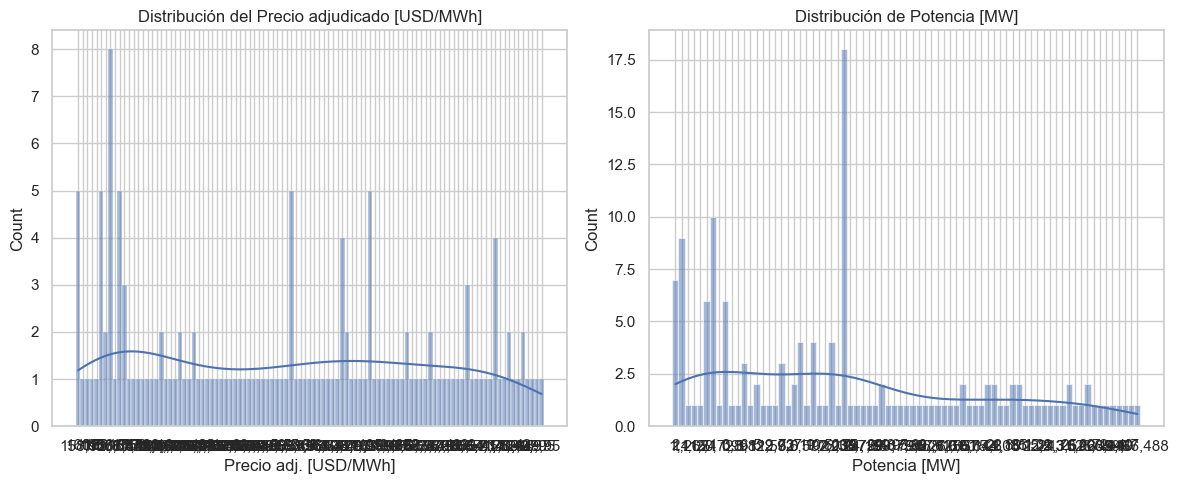

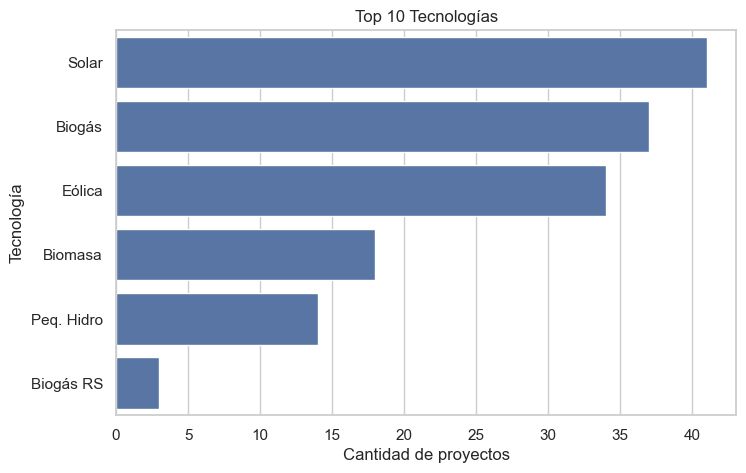

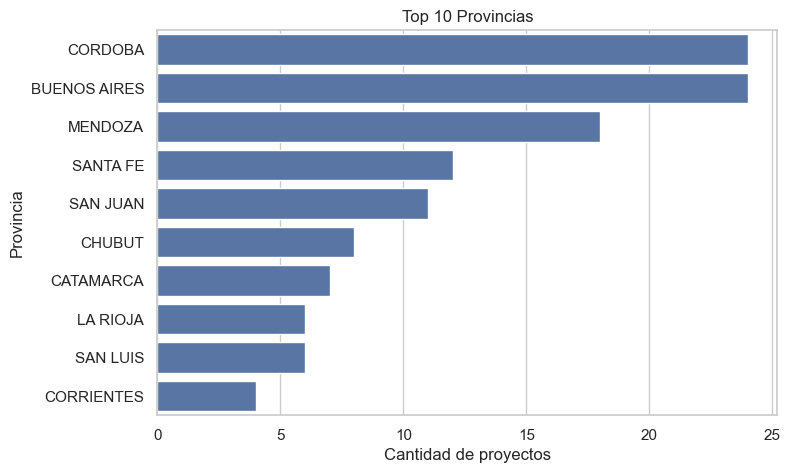

count                              147
mean     1970-01-01 00:00:00.000201670
min      1970-01-01 00:00:00.000201610
25%      1970-01-01 00:00:00.000201611
50%      1970-01-01 00:00:00.000201711
75%      1970-01-01 00:00:00.000201711
max      1970-01-01 00:00:00.000201711
Name: Fecha de adjudicacion, dtype: object


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# Estadísticas descriptivas RenovAr
# -------------------------------

# 1. Revisar los tipos de datos
print(renovar.dtypes)

# 2. Estadísticas descriptivas generales para columnas numéricas
# En tu caso: 'Precio adj. [USD/MWh]', 'Potencia [MW]'
print(renovar[['Precio adj. [USD/MWh]', 'Potencia [MW]']].describe())

# 3. Estadísticas para columnas categóricas
categorical_cols = ['Tecnología', 'Región', 'Provincia', 'Departamento', 'Ronda', 'Oferente']
for col in categorical_cols:
    print(f"\nDistribución de {col}:")
    print(renovar[col].value_counts())
    print(renovar[col].value_counts(normalize=True) * 100)  # porcentaje

# 4. Histogramas para variables numéricas
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(renovar['Precio adj. [USD/MWh]'], bins=20, kde=True)
plt.title('Distribución del Precio adjudicado [USD/MWh]')

plt.subplot(1,2,2)
sns.histplot(renovar['Potencia [MW]'], bins=20, kde=True)
plt.title('Distribución de Potencia [MW]')

plt.tight_layout()
plt.show()

# 5. Gráficos de barras para variables categóricas más relevantes
top_tecnologias = renovar['Tecnología'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_tecnologias.values, y=top_tecnologias.index)
plt.title('Top 10 Tecnologías')
plt.xlabel('Cantidad de proyectos')
plt.show()

top_provincias = renovar['Provincia'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_provincias.values, y=top_provincias.index)
plt.title('Top 10 Provincias')
plt.xlabel('Cantidad de proyectos')
plt.show()

# 6. Resumen rápido de fechas de adjudicación
renovar['Fecha de adjudicacion'] = pd.to_datetime(renovar['Fecha de adjudicacion'], errors='coerce')
print(renovar['Fecha de adjudicacion'].describe())


In [31]:
# -------------------------------
# Limpiar columnas numéricas en RenovAr
# -------------------------------

# Reemplazar comas por puntos (si existieran) y convertir a float
renovar['Precio adj. [USD/MWh]'] = (
    renovar['Precio adj. [USD/MWh]']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.extract(r'([0-9\.]+)')[0]  # extraer solo números y puntos
    .astype(float)
)

renovar['Potencia [MW]'] = (
    renovar['Potencia [MW]']
    .astype(str)
    .str.replace(',', '.', regex=False)
    .str.extract(r'([0-9\.]+)')[0]
    .astype(float)
)

# Verificamos que la conversión funcionó
print(renovar[cols_numericas].dtypes)
print(renovar[cols_numericas].head())


NameError: name 'cols_numericas' is not defined

=== Estadísticas descriptivas generales ===


,Precio adj. [USD/MWh],Potencia [MW]
count,147.000000,148.000000
mean,94.281663,60.357946
std,48.532275,366.509454
min,37.300000,0.500000
25%,52.610000,1.999500
50%,66.000000,10.500000
75%,144.482759,50.000000
max,177.850000,4466.488000



=== Precio promedio por Tecnología ===


,Precio adj. [USD/MWh],Potencia [MW]
Tecnología,,
Biogás,161.977568,1.752784
Biogás RS,129.033333,4.373333
Biomasa,124.339138,8.762222
Eólica,50.764118,72.536029
Peq. Hidro,101.940000,2.295714
Solar,50.924146,42.254390



=== Potencia promedio por Provincia ===


,Precio adj. [USD/MWh],Potencia [MW]
Provincia,,
BUENOS AIRES,95.729425,43.543542
CATAMARCA,46.628571,32.137143
CHACO,117.982759,8.300000
CHUBUT,49.535000,55.562500
CORDOBA,128.758549,7.802917
CORRIENTES,117.337845,16.355000
FORMOSA,126.810345,8.000000
JUJUY,60.000000,100.000000
LA PAMPA,84.166667,32.916667



=== Frecuencia de Tecnología ===


,Frecuencia,Porcentaje (%)
Tecnología,,
Solar,41,26.973684
Biogás,37,24.342105
Eólica,34,22.368421
Biomasa,18,11.842105
Peq. Hidro,14,9.210526
NaN,5,3.289474
Biogás RS,3,1.973684



=== Frecuencia de Región ===


,Frecuencia,Porcentaje (%)
Región,,
Centro,30,19.736842
Cuyo,29,19.078947
BSAS,24,15.789474
NOA,24,15.789474
Litoral,12,7.894737
Patagonia,11,7.236842
NEA,10,6.578947
Comahue,7,4.605263
NaN,5,3.289474



=== Frecuencia de Provincia ===


,Frecuencia,Porcentaje (%)
Provincia,,
CORDOBA,24,15.789474
BUENOS AIRES,24,15.789474
MENDOZA,18,11.842105
SANTA FE,12,7.894737
SAN JUAN,11,7.236842
CHUBUT,8,5.263158
CATAMARCA,7,4.605263
LA RIOJA,6,3.947368
SAN LUIS,6,3.947368



=== Frecuencia de Departamento ===


,Frecuencia,Porcentaje (%)
Departamento,,
Río Cuarto,8,5.263158
Luján de Cuyo,8,5.263158
General Pedernera,6,3.947368
Bahía Blanca,5,3.289474
Iglesia,5,3.289474
...,...,...
Lavalle,1,0.657895
Sarmiento,1,0.657895
Capayán,1,0.657895



=== Frecuencia de Ronda ===


,Frecuencia,Porcentaje (%)
Ronda,,
Ronda 2,88,57.894737
"Ronda 1,5",30,19.736842
Ronda 1,29,19.078947
NaN,5,3.289474



=== Frecuencia de Oferente ===


,Frecuencia,Porcentaje (%)
Oferente,,
EMPRESA MENDOCINA DE ENERGÍA S.A.P.E.M.,7,4.605263
LATINOAMERICANA DE ENERGÍA S.A.,5,3.289474
ENERGIA SUSTENTABLE S.A.,5,3.289474
"ACZIA BIOGAS, S.L.",4,2.631579
EMESA / CONST. ELECT. DEL OESTE,4,2.631579
...,...,...
NEOEN SAS,1,0.657895
MARTIFER RENEWABLES SGPS S.A.,1,0.657895
VERANO CAPITAL SOLAR 1 SA.,1,0.657895


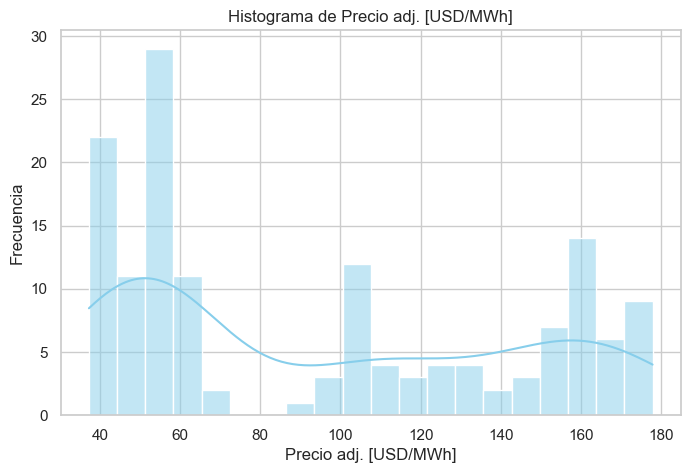

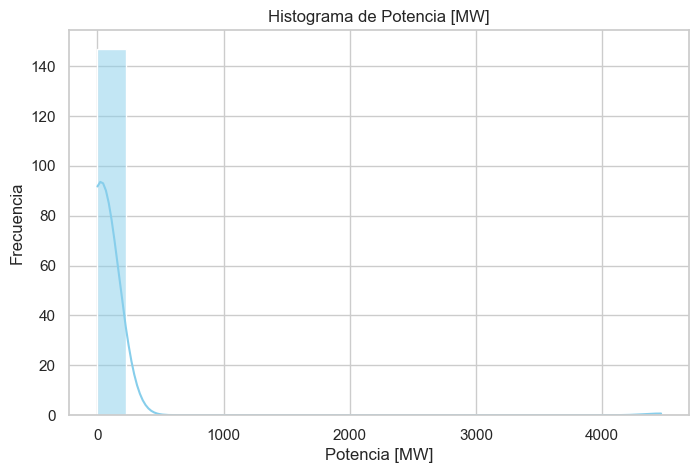

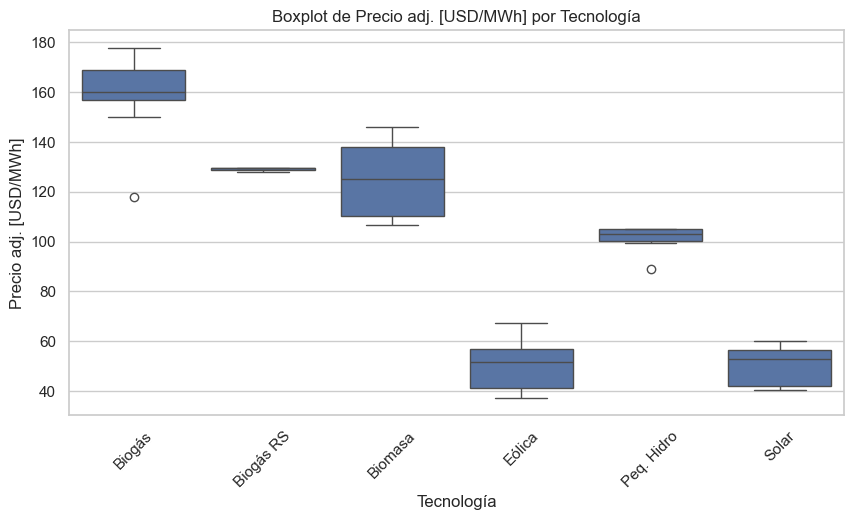

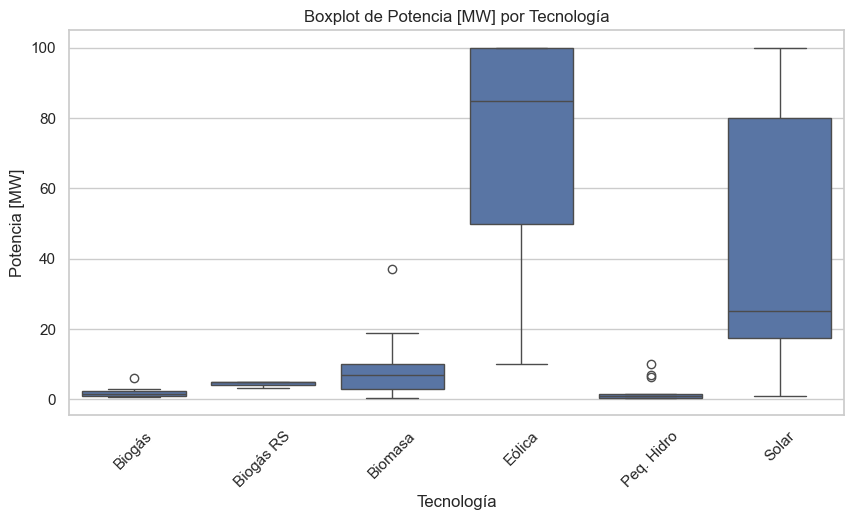

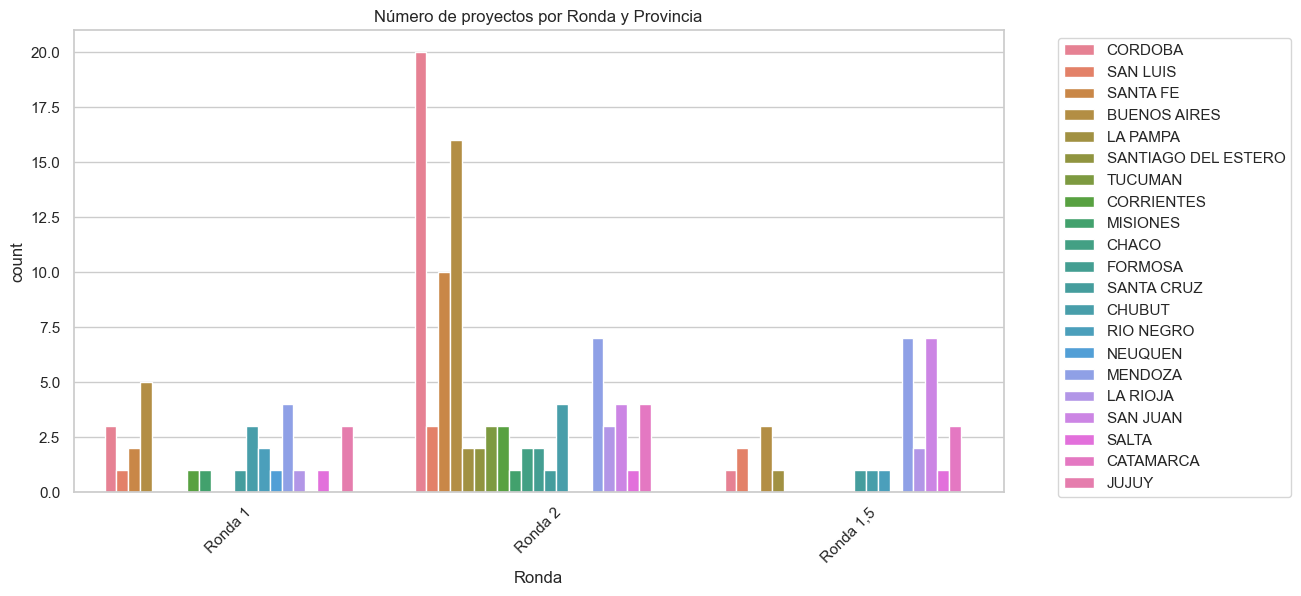

In [45]:
# -------------------------------
# Estadísticas descriptivas y visualizaciones para RenovAr
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas de interés
cols_numericas = ['Precio adj. [USD/MWh]', 'Potencia [MW]']
cols_categoricas = ['Tecnología', 'Región', 'Provincia', 'Departamento', 'Ronda', 'Oferente']

# 1. Estadísticas descriptivas generales de variables numéricas
print("=== Estadísticas descriptivas generales ===")
display(renovar[cols_numericas].describe())

# 2. Estadísticas por categoría: media, min, max por Tecnología y Provincia
print("\n=== Precio promedio por Tecnología ===")
display(renovar.groupby('Tecnología')[cols_numericas].mean())

print("\n=== Potencia promedio por Provincia ===")
display(renovar.groupby('Provincia')[cols_numericas].mean())

# 3. Tablas de frecuencia para variables categóricas
for col in cols_categoricas:
    print(f"\n=== Frecuencia de {col} ===")
    freq = renovar[col].value_counts(dropna=False)
    perc = renovar[col].value_counts(normalize=True, dropna=False) * 100
    freq_table = pd.DataFrame({'Frecuencia': freq, 'Porcentaje (%)': perc})
    display(freq_table)

# 4. Histogramas de variables numéricas
for col in cols_numericas:
    plt.figure(figsize=(8,5))
    sns.histplot(renovar[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# 5. Boxplots para detectar outliers por variable numérica y Tecnología
for col in cols_numericas:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='Tecnología', y=col, data=renovar)
    plt.title(f'Boxplot de {col} por Tecnología')
    plt.xticks(rotation=45)
    plt.show()

# 6. Conteo de proyectos por Ronda y Provincia (visualización simple)
plt.figure(figsize=(12,6))
sns.countplot(data=renovar, x='Ronda', hue='Provincia')
plt.title('Número de proyectos por Ronda y Provincia')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
